In [1]:
from THM_main import Version5_THM_prototype
from iapws import IAPWS97
import numpy as np
from THM_main import plotting
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
# Begining of the script used to test the THM prototype class.

In [2]:
case_name = "PSBT BenchMark Ex1 12223"
#User choice:
solveConduction = False
plot_at_z1 = []

########## Thermal hydraulics parameters ##########
## Geometric parameters
canalType = "square"
waterRadius = 0.0133409 # m
fuelRadius = 0.00542310/2 # m : fuel rod radius
gapRadius = fuelRadius + 0.0000001  # m : expansion gap radius : "void" between fuel and clad - equivalent to inner clad radius
cladRadius =  0.0094996/2 # m : clad external radius
height = 1.555 # m : height : active core height in BWRX-300 SMR

## Fluid parameters
pOutlet = 14719781.65 # Pa
tInlet = 592.75 #K
u_inlet = 4.467092221 #m/s
pressureDrop = 186737 #Pa/m
falsePInlet = pOutlet + height * pressureDrop
rhoInlet = IAPWS97(T = tInlet, P = falsePInlet*10**(-6)).rho #kg/m3
flowArea = waterRadius ** 2 - np.pi * cladRadius ** 2
qFlow = u_inlet * rhoInlet * flowArea # kg/m^2/s

## Meshing parameters:
If = 8
I1 = 3
Iz1 = 70 # number of control volumes in the axial direction

## Thermalhydraulics correlation
voidFractionCorrel = "EPRIvoidModel"    #choice between 'EPRIvoidModel' and 'GEramp' and 'modBestion' and 'HEM1'
frfaccorel = "blasius"                #choice between 'Churchill' and 'blasius' 'base'
P2Pcorel = "MNmodel"                       #choice between 'HEM1' and 'HEM2' and 'MNmodel'
numericalMethod = 'BiCG'            #choice between 'BiCG', 'BiCGStab', 'GaussSiedel' and 'FVM'

############ Nuclear Parameters ###########
## Fission parameters

#qFiss = 1943301220 # W/m3
## Material parameters
kFuel = 4.18 # W/m.K, TECHNICAL REPORTS SERIES No. 59 : Thermal Conductivity of Uranium Dioxide, IAEA, VIENNA, 1966
Hgap = 10000
kClad = 21.5 # W/m.K, Thermal Conductivity of Zircaloy-2 (as used in BWRX-300) according to https://www.matweb.com/search/datasheet.aspx?MatGUID=eb1dad5ce1ad4a1f9e92f86d5b44740d
# k_Zircaloy-4 = 21.6 W/m.K too so check for ATRIUM-10 clad material but should have the same thermal conductivity
########## Algorithm parameters ###########
nIter = 1000
tol = 1e-4

qFiss = [1000000000, 1500000000, 2000000000, 2500000000, 3000000000, 3500000000, 4000000000, 4500000000, 5000000000]
caseMerge = []
for q in qFiss:
    Qfiss1 = []
    for i in range(Iz1): 
        Qfiss1.append(q)
        
    P2Pcorel = "MNmodel"
    frfaccorel = "blasius"
    case0 = Version5_THM_prototype(case_name, canalType,
                    waterRadius, fuelRadius, gapRadius, cladRadius, height, tInlet, pOutlet, qFlow, Qfiss1,
                    kFuel, Hgap, kClad, Iz1, If, I1, plot_at_z1, solveConduction,
                    dt = 0, t_tot = 0, frfaccorel = frfaccorel, P2Pcorel = P2Pcorel, voidFractionCorrel = voidFractionCorrel, numericalMethod = numericalMethod)

    frfaccorel = "Churchill"
    case1 = Version5_THM_prototype(case_name, canalType,
                    waterRadius, fuelRadius, gapRadius, cladRadius, height, tInlet, pOutlet, qFlow, Qfiss1,
                    kFuel, Hgap, kClad, Iz1, If, I1, plot_at_z1, solveConduction,
                    dt = 0, t_tot = 0, frfaccorel = frfaccorel, P2Pcorel = P2Pcorel, voidFractionCorrel = voidFractionCorrel, numericalMethod = numericalMethod)

    """ frfaccorel = "base"
    case2 = Version5_THM_prototype(case_name, canalType,
                    waterRadius, fuelRadius, gapRadius, cladRadius, height, tInlet, pOutlet, qFlow, Qfiss1,
                    kFuel, Hgap, kClad, Iz1, If, I1, plot_at_z1, solveConduction,
                    dt = 0, t_tot = 0, frfaccorel = frfaccorel, P2Pcorel = P2Pcorel, voidFractionCorrel = voidFractionCorrel, numericalMethod = numericalMethod) """

    P2Pcorel = "HEM2"
    frfaccorel = "blasius"
    case3 = Version5_THM_prototype(case_name, canalType,
                    waterRadius, fuelRadius, gapRadius, cladRadius, height, tInlet, pOutlet, qFlow, Qfiss1,
                    kFuel, Hgap, kClad, Iz1, If, I1, plot_at_z1, solveConduction,
                    dt = 0, t_tot = 0, frfaccorel = frfaccorel, P2Pcorel = P2Pcorel, voidFractionCorrel = voidFractionCorrel, numericalMethod = numericalMethod)


    frfaccorel = "Churchill"
    case4 = Version5_THM_prototype(case_name, canalType,
                    waterRadius, fuelRadius, gapRadius, cladRadius, height, tInlet, pOutlet, qFlow, Qfiss1,
                    kFuel, Hgap, kClad, Iz1, If, I1, plot_at_z1, solveConduction,
                    dt = 0, t_tot = 0, frfaccorel = frfaccorel, P2Pcorel = P2Pcorel, voidFractionCorrel = voidFractionCorrel, numericalMethod = numericalMethod)

    """ frfaccorel = "base"
    case5 = Version5_THM_prototype(case_name, canalType,
                    waterRadius, fuelRadius, gapRadius, cladRadius, height, tInlet, pOutlet, qFlow, Qfiss1,
                    kFuel, Hgap, kClad, Iz1, If, I1, plot_at_z1, solveConduction,
                    dt = 0, t_tot = 0, frfaccorel = frfaccorel, P2Pcorel = P2Pcorel, voidFractionCorrel = voidFractionCorrel, numericalMethod = numericalMethod) """

    P2Pcorel = "lockhartMartinelli"
    frfaccorel = "blasius"
    case6 = Version5_THM_prototype(case_name, canalType,
                    waterRadius, fuelRadius, gapRadius, cladRadius, height, tInlet, pOutlet, qFlow, Qfiss1,
                    kFuel, Hgap, kClad, Iz1, If, I1, plot_at_z1, solveConduction,
                    dt = 0, t_tot = 0, frfaccorel = frfaccorel, P2Pcorel = P2Pcorel, voidFractionCorrel = voidFractionCorrel, numericalMethod = numericalMethod)


    frfaccorel = "Churchill"
    case7 = Version5_THM_prototype(case_name, canalType,
                    waterRadius, fuelRadius, gapRadius, cladRadius, height, tInlet, pOutlet, qFlow, Qfiss1,
                    kFuel, Hgap, kClad, Iz1, If, I1, plot_at_z1, solveConduction,
                    dt = 0, t_tot = 0, frfaccorel = frfaccorel, P2Pcorel = P2Pcorel, voidFractionCorrel = voidFractionCorrel, numericalMethod = numericalMethod)

    """ frfaccorel = "base"
    case8 = Version5_THM_prototype(case_name, canalType,
                    waterRadius, fuelRadius, gapRadius, cladRadius, height, tInlet, pOutlet, qFlow, Qfiss1,
                    kFuel, Hgap, kClad, Iz1, If, I1, plot_at_z1, solveConduction,
                    dt = 0, t_tot = 0, frfaccorel = frfaccorel, P2Pcorel = P2Pcorel, voidFractionCorrel = voidFractionCorrel, numericalMethod = numericalMethod) """
    
    caseMerge.append([case0, case1, case3, case4, case6, case7])


$$$---------- THM: prototype, case treated : PSBT BenchMark Ex1 12223.
$$$---------- THM: prototype, steady state case.
$$---------- Calling DFM class.
Setting up heat convection solution along the axial dimension. zmax = 1.555 m with 70 axial elements.
self.I_z: 70
self.qFlow: 0.32526840090529774
self.pOutlet: 14719781.65
self.Lf: 1.555
self.r_f: 0.00271155
self.clad_r: 0.0047498
self.r_w: 0.0133409
self.Dz: 0.022214285714285714
self.dt: 0
Courant number: 0.0
Numerical Method BiCG
Velocity at the inlet:  4.467092221
cote: 0.0133409
cladRadius: 0.0047498
Dh: 0.014355160325313157
Hydraulic diameter: [0.014355160325313157, 0.014355160325313157, 0.014355160325313157, 0.014355160325313157, 0.014355160325313157, 0.014355160325313157, 0.014355160325313157, 0.014355160325313157, 0.014355160325313157, 0.014355160325313157, 0.014355160325313157, 0.014355160325313157, 0.014355160325313157, 0.014355160325313157, 0.014355160325313157, 0.014355160325313157, 0.014355160325313157, 0.01435516032531315

c:\Users\cleme\OneDrive\Documents\Poly\BWR\THM_prototype\THM_waterProp.py:561: RuntimeWarning: divide by zero encountered in scalar divide
  return self.U[i] - (self.voidFractionTEMP[i] / ( 1 - self.voidFractionTEMP[i])) * (self.rhogTEMP[i] / self.rhoTEMP[i]) * self.VgjPrimeTEMP[i]
c:\Users\cleme\OneDrive\Documents\Poly\BWR\THM_prototype\THM_waterProp.py:576: RuntimeWarning: invalid value encountered in sqrt
  return 1 + 1/np.sqrt(X) + 20/X


Convergence test, residuals: epsilon: 0.3850736165213674, rho: 0.3289040965458192, xTh: 6.740919818541088
uInlet:4.472368324384378
VAR_VFM_Class: [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-6.51577566e-02  6.51423962e-02  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -6.51423962e-02  6.51270357e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.07103397e-04
   1.07103397e-04  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  -1.07103397e-04  1.07103397e-04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]]
VAR_VFM_Class: [4.47236832e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00

In [11]:
class GFPlotter():
    def __init__(self, caseList, directory_path, case_name):
        self.case_name = f'{case_name}\\'

        self.caseList = caseList
        self.directory_path = directory_path
        self.height = self.caseList[0].convection_sol.height

        self.data_dict_list = []
        self.data_dict = self.read_files_in_directory()
        self.allow_space()

        self.struture_fraction = 1 - (self.alpha_liquid[0] + self.alpha_vapour[0])

        self.calculateFields()
        self.createZ()

    def plotCase(self):
        title = f"f: {self.caseList[0].convection_sol.frfaccorel}, \n Méthode numérique: {self.caseList[0].convection_sol.numericalMethod}, \n Correlation void fraction: {self.caseList[0].convection_sol.voidFractionCorrel}"
        labelTitle = 'DFM'
        fig1, ax1 = plt.subplots()
        for i in range(len(self.caseList)):
            ax1.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.T_water, label=labelTitle)
        ax1.set_xlabel("Axial position in m")
        ax1.set_ylabel("Temperature in K")
        ax1.set_title(f"{title}")
        ax1.grid()
        ax1.legend(loc="best")
        fig1.savefig(rf'result\{self.case_name}\Tcoolant.png', bbox_inches='tight')

        fig2, ax2 = plt.subplots()
        for i in range(len(self.caseList)):
            ax2.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.voidFraction[-1], label=labelTitle)

        ax2.set_xlabel("Axial position in m")
        ax2.set_ylabel("Void fraction")
        ax2.set_title(f"{title}")
        ax2.grid()
        ax2.legend(loc="best")
        fig2.savefig(rf'result\{self.case_name}\epsilon.png', bbox_inches='tight')

        fig3, ax3 = plt.subplots()
        for i in range(len(self.caseList)):
            ax3.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.rho[-1], label=labelTitle)

        ax3.set_xlabel("Axial position in m")
        ax3.set_ylabel("Density in kg/m^3")
        ax3.set_title(f"{title}")
        ax3.grid()
        ax3.legend(loc="best")
        fig3.savefig(rf'result\{self.case_name}\Rho.png', bbox_inches='tight')

        fig7, ax7 = plt.subplots()
        for i in range(len(self.caseList)):
            ax7.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.rhoL[-1], label=labelTitle)
        ax7.set_xlabel("Axial position in m")
        ax7.set_ylabel("Liquid density in kg/m^3")
        ax7.set_title(f"{title}")
        ax7.grid()
        ax7.legend(loc="best")
        fig7.savefig(rf'result\{self.case_name}\RhoL.png', bbox_inches='tight')

        fig8, ax8 = plt.subplots()
        for i in range(len(self.caseList)):
            ax8.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.rhoG[-1], label=labelTitle)
        ax8.set_xlabel("Axial position in m")
        ax8.set_ylabel("Vapour density in kg/m^3")
        ax8.set_title(f"{title}")
        ax8.grid()
        ax8.legend(loc="best")
        fig8.savefig(rf'result\{self.case_name}\RhoG.png', bbox_inches='tight')

        fig4, ax4 = plt.subplots() 
        for i in range(len(self.caseList)):
            labelTitle = f"DFM {self.caseList[i].convection_sol.frfaccorel}"
            ax4.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.P[-1], label=labelTitle)
        ax4.step(self.zList, self.p_rgh, label="GenFoam P_rgh")
        ax4.set_xlabel("Axial position in m")
        ax4.set_ylabel("Pressure in Pa")
        ax4.grid()
        ax4.set_title(f"{title}")
        ax4.legend(loc="best")
        fig4.savefig(rf'result\{self.case_name}\P.png', bbox_inches='tight')

        fig5, ax5 = plt.subplots()
        for i in range(len(self.caseList)):
            ax5.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.Ul, label=labelTitle)
        ax5.set_xlabel("Axial position in m")
        ax5.set_ylabel("Liquid Velocity in m/s")
        ax5.set_title(f"{title}")
        ax5.grid()
        ax5.legend(loc="best")
        fig5.savefig(rf'result\{self.case_name}\Ul.png', bbox_inches='tight')

        fig6, ax6 = plt.subplots()
        for i in range(len(self.caseList)):
            ax6.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.Ug, label=labelTitle)
        ax6.set_xlabel("Axial position in m")
        ax6.set_ylabel("Vapour Velocity in m/s")
        ax6.set_title(f"{title}")
        ax6.grid()
        ax6.legend(loc="best")
        fig6.savefig(rf'result\{self.case_name}\Ug.png', bbox_inches='tight')

        fig9, ax9 = plt.subplots()
        for i in range(len(self.caseList)):
            ax9.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.U[-1], label=labelTitle)
        ax9.set_xlabel("Axial position in m")
        ax9.set_ylabel("Mixture Velocity in m/s")
        ax9.set_title(f"{title}")
        ax9.grid()
        ax9.legend(loc="best")
        fig9.savefig(rf'result\{self.case_name}\U.png', bbox_inches='tight')

        fig10, ax10 = plt.subplots()
        for i in range(len(self.caseList)):
            ax10.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.Rel, label=labelTitle)
        ax10.set_xlabel("Axial position in m")
        ax10.set_ylabel("Reynolds number")
        ax10.set_title(f"{title}")
        ax10.grid()
        ax10.legend(loc="best")
        fig10.savefig(rf'result\{self.case_name}\Re.png', bbox_inches='tight')

        fig11, ax11 = plt.subplots()
        ax11.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.xTh[-1], label=labelTitle)
        ax11.set_xlabel("Axial position in m")
        ax11.set_ylabel("xTh")
        ax11.set_title(f"{title}")
        ax11.grid()
        ax11.legend(loc="best")
        fig11.savefig(rf'result\{self.case_name}\xTh.png', bbox_inches='tight')

        
        """ fig12, ax12 = plt.subplots()
        for i in range(len(self.caseList)):
            rhoUA_liquid = [self.caseList[i].convection_sol.Ul[j] * self.caseList[i].convection_sol.rhoL[-1][j]*self.caseList[i].convection_sol.areaMatrix[j] for j in range(len(self.caseList[i].convection_sol.Ul))]
            ax12.step(self.caseList[i].convection_sol.z_mesh, rhoUA_liquid, label=labelTitle + " rhoUA_liquid")
        #ax12.step(self.zList, self.alphaRhoMagU_liquid, label="GenFoam")
        ax12.set_xlabel("Axial position in m")
        ax12.set_ylabel("rhoUA_liquid")
        ax12.set_title(f"{title}")
        ax12.grid()
        fig12.savefig(rf'result\{self.case_name}\rhoUA_liquid.png', bbox_inches='tight')

        fig13, ax13 = plt.subplots()
        for i in range(len(self.caseList)):
            rhoUA_vapour = [self.caseList[i].convection_sol.Ug[j] * self.caseList[i].convection_sol.rhoG[-1][j]*self.caseList[i].convection_sol.areaMatrix[j] for j in range(len(self.caseList[i].convection_sol.Ug))]
            ax13.step(self.caseList[i].convection_sol.z_mesh, rhoUA_vapour, label=labelTitle + " rhoUA_vapour")
        #ax13.step(self.zList, self.alphaRhoMagU_vapour, label="GenFoam")
        ax13.set_xlabel("Axial position in m")
        ax13.set_ylabel("rhoUA_vapour")
        ax13.set_title(f"{title}")
        ax13.grid()
        fig13.savefig(rf'result\{self.case_name}\rhoUA_vapour.png', bbox_inches='tight')

        fig14, ax14 = plt.subplots()
        for i in range(len(self.caseList)):
            self.rhoUA = [self.caseList[i].convection_sol.U[-1][j] * self.caseList[i].convection_sol.rho[-1][j]*self.caseList[i].convection_sol.areaMatrix[j] for j in range(len(self.caseList[i].convection_sol.Ug))]
            ax14.step(self.caseList[i].convection_sol.z_mesh, self.rhoUA, label=labelTitle + " rhoUA")
        #ax14.step(self.zList, self.alphaRhoMagU_liquid, label="GenFoam")
        ax14.set_xlabel("Axial position in m")
        ax14.set_ylabel("rhoUA")
        ax14.set_title(f"{title}")
        ax14.grid()
        fig14.savefig(rf'result\{self.case_name}\rhoUA.png', bbox_inches='tight') """
        

        plt.show()

    def createZ(self):
        self.zList = np.linspace(0, self.height, len(self.alpha_liquid))

    def read_files_in_directory(self):
        data_dict = {}
        print(f"Reading files in directory: {self.directory_path}")
        # Parcourt tous les fichiers du dossier
        for filename in os.listdir(self.directory_path):
            file_path = os.path.join(self.directory_path, filename)
            # Vérifie que c'est bien un fichier
            if os.path.isfile(file_path):

                with open(file_path, 'r') as file:
                    content = file.read()
                    
                    # Trouve la première parenthèse ouvrante et fermante
                    start = content.find('(')
                    end = content.find(')', start)
                    #end = start + 74
                    if start != -1 and end != -1:
                        # Extrait les données entre les parenthèses
                        data_str = content[start+1:end].strip()
                        # Divise les lignes en liste de chaînes
                        data_lines = data_str.splitlines()
                        if len(data_lines) != 1:
                            float_list = [float(item) for item in data_lines]
                            data_dict[filename] = float_list

                    if len(data_lines) == 1:
                        # Trouve la première parenthèse ouvrante et fermante
                        start = content.find('(')
                        end = content.find(';', start)
                        #end = start
                        if start != -1 and end != -1:
                            # Extrait les données entre les parenthèses
                            data_str = content[start+1:end].strip()
                            # Divise les lignes en liste de chaînes
                            data_lines = data_str.splitlines()
                            data_lines.pop()
                            x, y, z = np.zeros(len(data_lines)), np.zeros(len(data_lines)), np.zeros(len(data_lines))
                            for i in range(len(data_lines)):
                                a = values = data_lines[i].strip("()").split()
                                x[i] = float(a[0])
                                y[i] = float(a[1])
                                z[i] = float(a[2])
                            data_dict[fr'{filename}_x'] = x
                            data_dict[fr'{filename}_y'] = y
                            data_dict[fr'{filename}_z'] = z
        
        return data_dict
    
    def allow_space(self):
        self.alpha_liquid = np.array(self.data_dict['alpha.liquid'])
        self.alpha_vapour = np.array(self.data_dict['alpha.vapour'])
        #self.alpha_powerModel = np.array(self.data_dict['alpha.powerModel'])
        self.alphaPhi_liquid = np.array(self.data_dict['alphaPhi.liquid']+ [self.data_dict['alphaPhi.liquid'][-1]])
        self.alphaPhi_vapour = np.array(self.data_dict['alphaPhi.vapour']+ [self.data_dict['alphaPhi.vapour'][-1]])
        self.alphaRhoMagU_liquid = np.array(self.data_dict['alphaRhoMagU.liquid'])#+ [self.data_dict['alphaRhoMagU.liquid'][-1]])
        self.alphaRhoMagU_vapour = np.array(self.data_dict['alphaRhoMagU.vapour'])#+ [self.data_dict['alphaRhoMagU.vapour'][-1]])
        self.alphaRhoPhi_liquid = np.array(self.data_dict['alphaRhoPhi.liquid']+ [self.data_dict['alphaRhoPhi.liquid'][-1]])
        self.alphaRhoPhi_vapour = np.array(self.data_dict['alphaRhoPhi.vapour']+ [self.data_dict['alphaRhoPhi.vapour'][-1]])
        self.areaDensity_interface = np.array(self.data_dict['areaDensity.interface'])
        self.dgdt_liquid = np.array(self.data_dict['dgdt.liquid'])
        self.dgdt_vapour = np.array(self.data_dict['dgdt.vapour'])
        self.dmdt_vapour = np.array(self.data_dict['dmdt.liquid.vapour'])
        self.heatFlux_structure = np.array(self.data_dict['heatFlux.structure'])
        self.htc_liquid_interface = np.array(self.data_dict['htc.liquid.interface'])
        self.htc_liquid_structure = np.array(self.data_dict['htc.liquid.structure'])
        self.p = np.array(self.data_dict['p'])
        self.p_rgh = np.array(self.data_dict['p_rgh'])
        self.Re_liquid_structure = np.array(self.data_dict['Re.liquid.structure'])
        #self.Re_vapour_structure = np.array(self.data_dict['Re.vapour.structure'])
        self.Re_liquid_vapour = np.array(self.data_dict['Re.liquid.vapour'])
        self.T_fixedPower = np.array(self.data_dict['T.fixedPower'])
        self.T_liquid = np.array(self.data_dict['T.liquid'])
        self.T_vapour = np.array(self.data_dict['T.vapour'])
        self.U_liquid_x = np.array(self.data_dict['U.liquid_x'])
        self.U_liquid_y = np.array(self.data_dict['U.liquid_y'])
        self.U_liquid_z = np.array(self.data_dict['U.liquid_z'])
        self.U_vapour_x = np.array(self.data_dict['U.vapour_x'])
        self.U_vapour_y = np.array(self.data_dict['U.vapour_y'])
        self.U_vapour_z = np.array(self.data_dict['U.vapour_z'])

    def calculateFields(self):
        self.alpha_vapour = self.alpha_vapour/(1-self.struture_fraction)
        self.alpha_liquid = self.alpha_liquid/(1-self.struture_fraction)
        self.U_liquid = np.sqrt(self.U_liquid_x**2 + self.U_liquid_y**2 + self.U_liquid_z**2)
        self.U_vapour = np.sqrt(self.U_vapour_x**2 + self.U_vapour_y**2 + self.U_vapour_z**2)
        self.U_mixture = (1-self.alpha_vapour) * self.U_liquid + self.alpha_vapour * self.U_vapour

        self.rho_liquid  = self.alphaRhoPhi_liquid/(self.alphaPhi_liquid)
        self.rho_vapour = self.alphaRhoPhi_vapour/(self.alphaPhi_vapour)
        for i in range(len(self.rho_vapour)):
            if np.isnan(self.rho_vapour[i]):
                self.rho_vapour[i] = 0
            if np.isnan(self.rho_liquid[i]):
                self.rho_liquid[i] = 0
        self.rho_mixture = self.rho_liquid + self.rho_vapour

        self.T_mixture = (1-self.alpha_vapour) * self.T_liquid + self.alpha_vapour * self.T_vapour

    def plotComparison(self):
        file_path = rf'C:\Users\cleme\OneDrive\Documents\Poly\BWR\driftFluxModel\thermalHydraulicsPoro\result\{self.case_name}'
        os.makedirs(os.path.dirname(file_path), exist_ok=True)
        if len(self.caseList) == 1:
            labelTitle = 'DFM'
        labelTitle = 'DFM'
        title = f"f: {self.caseList[0].convection_sol.frfaccorel}, \n Méthode numérique: {self.caseList[0].convection_sol.numericalMethod}, \n Correlation void fraction: {self.caseList[0].convection_sol.voidFractionCorrel}"
        fig1, ax1 = plt.subplots()
        for i in range(len(self.caseList)):
            ax1.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.T_water, label=labelTitle)
        ax1.step(self.zList, self.T_liquid, label="GenFoam T.liquid")
        ax1.step(self.zList, self.T_vapour, label="GenFoam T.vapour")
        ax1.step(self.zList, self.T_mixture, label="GenFoam T.mixture")
        ax1.set_xlabel("Axial position in m")
        ax1.set_ylabel("Temperature in K")
        ax1.set_title(f"{title}")
        ax1.grid()
        ax1.legend(loc="best")
        fig1.savefig(rf'result\{self.case_name}\Tcoolant.png', bbox_inches='tight')

        fig2, ax2 = plt.subplots()
        for i in range(len(self.caseList)):
            ax2.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.voidFraction[-1], label=labelTitle)
        ax2.step(self.zList, self.alpha_vapour, label="GenFoam")
        ax2.set_xlabel("Axial position in m")
        ax2.set_ylabel("Void fraction")
        ax2.set_title(f"{title}")
        ax2.grid()
        ax2.legend(loc="best")
        fig2.savefig(rf'result\{self.case_name}\epsilon.png', bbox_inches='tight')

        fig3, ax3 = plt.subplots()
        for i in range(len(self.caseList)):
            ax3.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.rho[-1], label=labelTitle)
        ax3.plot(self.zList, self.rho_mixture, label="GenFoam")
        ax3.set_xlabel("Axial position in m")
        ax3.set_ylabel("Density in kg/m^3")
        ax3.set_title(f"{title}")
        ax3.grid()
        ax3.legend(loc="best")
        fig3.savefig(rf'result\{self.case_name}\Rho.png', bbox_inches='tight')

        fig7, ax7 = plt.subplots()
        for i in range(len(self.caseList)):
            ax7.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.rhoL[-1], label=labelTitle)
        ax7.plot(self.zList, self.rho_liquid, label="GenFoam")
        ax7.set_xlabel("Axial position in m")
        ax7.set_ylabel("Liquid density in kg/m^3")
        ax7.set_title(f"{title}")
        ax7.grid()
        ax7.legend(loc="best")
        fig7.savefig(rf'result\{self.case_name}\RhoL.png', bbox_inches='tight')

        fig8, ax8 = plt.subplots()
        for i in range(len(self.caseList)):
            ax8.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.rhoG[-1], label=labelTitle)
        ax8.plot(self.zList, self.rho_vapour, label="GenFoam")
        ax8.set_xlabel("Axial position in m")
        ax8.set_ylabel("Vapour density in kg/m^3")
        ax8.set_title(f"{title}")
        ax8.grid()
        ax8.legend(loc="best")
        fig8.savefig(rf'result\{self.case_name}\RhoG.png', bbox_inches='tight')

        fig4, ax4 = plt.subplots() 
        for i in range(len(self.caseList)):
            labelTitle = f"DFM {self.caseList[i].convection_sol.frfaccorel} {self.caseList[i].convection_sol.P2Pcorel}"
            ax4.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.P[-1], label=labelTitle)
        ax4.step(self.zList, self.p, label="GenFoam")
        ax4.step(self.zList, self.p_rgh, label="GenFoam P_rgh")
        ax4.set_xlabel("Axial position in m")
        ax4.set_ylabel("Pressure in Pa")
        ax4.grid()
        ax4.set_title(f"{title}")
        ax4.legend(loc="best")
        fig4.savefig(rf'result\{self.case_name}\P.png', bbox_inches='tight')

        fig5, ax5 = plt.subplots()
        for i in range(len(self.caseList)):
            ax5.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.Ul, label=labelTitle)
        ax5.step(self.zList, self.U_liquid, label="GenFoam")
        ax5.set_xlabel("Axial position in m")
        ax5.set_ylabel("Liquid Velocity in m/s")
        ax5.set_title(f"{title}")
        ax5.grid()
        ax5.legend(loc="best")
        fig5.savefig(rf'result\{self.case_name}\Ul.png', bbox_inches='tight')

        fig6, ax6 = plt.subplots()
        for i in range(len(self.caseList)):
            ax6.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.Ug, label=labelTitle)
        ax6.step(self.zList, self.U_vapour, label="GenFoam")
        ax6.set_xlabel("Axial position in m")
        ax6.set_ylabel("Vapour Velocity in m/s")
        ax6.set_title(f"{title}")
        ax6.grid()
        ax6.legend(loc="best")
        fig6.savefig(rf'result\{self.case_name}\Ug.png', bbox_inches='tight')

        fig9, ax9 = plt.subplots()
        for i in range(len(self.caseList)):
            ax9.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.U[-1], label=labelTitle)
        ax9.step(self.zList, self.U_mixture, label="GenFoam")
        ax9.set_xlabel("Axial position in m")
        ax9.set_ylabel("Mixture Velocity in m/s")
        ax9.set_title(f"{title}")
        ax9.grid()
        ax9.legend(loc="best")
        fig9.savefig(rf'result\{self.case_name}\U.png', bbox_inches='tight')

        fig10, ax10 = plt.subplots()
        for i in range(len(self.caseList)):
            ax10.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.Rel, label=labelTitle)
        ax10.step(self.zList, self.Re_liquid_structure, label="GenFoam")
        ax10.set_xlabel("Axial position in m")
        ax10.set_ylabel("Reynolds number")
        ax10.set_title(f"{title}")
        ax10.grid()
        ax10.legend(loc="best")
        fig10.savefig(rf'result\{self.case_name}\Re.png', bbox_inches='tight')

        fig11, ax11 = plt.subplots()
        ax11.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.xTh[-1], label=labelTitle)
        ax11.set_xlabel("Axial position in m")
        ax11.set_ylabel("xTh")
        ax11.set_title(f"{title}")
        ax11.grid()
        ax11.legend(loc="best")
        fig11.savefig(rf'result\{self.case_name}\xTh.png', bbox_inches='tight')

        
        """ fig12, ax12 = plt.subplots()
        for i in range(len(self.caseList)):
            rhoUA_liquid = [self.caseList[i].convection_sol.Ul[j] * self.caseList[i].convection_sol.rhoL[-1][j]*self.caseList[i].convection_sol.areaMatrix[j] for j in range(len(self.caseList[i].convection_sol.Ul))]
            ax12.step(self.caseList[i].convection_sol.z_mesh, rhoUA_liquid, label=labelTitle + " rhoUA_liquid")
        #ax12.step(self.zList, self.alphaRhoMagU_liquid, label="GenFoam")
        ax12.set_xlabel("Axial position in m")
        ax12.set_ylabel("rhoUA_liquid")
        ax12.set_title(f"{title}")
        ax12.grid()
        fig12.savefig(rf'result\{self.case_name}\rhoUA_liquid.png', bbox_inches='tight')

        fig13, ax13 = plt.subplots()
        for i in range(len(self.caseList)):
            rhoUA_vapour = [self.caseList[i].convection_sol.Ug[j] * self.caseList[i].convection_sol.rhoG[-1][j]*self.caseList[i].convection_sol.areaMatrix[j] for j in range(len(self.caseList[i].convection_sol.Ug))]
            ax13.step(self.caseList[i].convection_sol.z_mesh, rhoUA_vapour, label=labelTitle + " rhoUA_vapour")
        #ax13.step(self.zList, self.alphaRhoMagU_vapour, label="GenFoam")
        ax13.set_xlabel("Axial position in m")
        ax13.set_ylabel("rhoUA_vapour")
        ax13.set_title(f"{title}")
        ax13.grid()
        fig13.savefig(rf'result\{self.case_name}\rhoUA_vapour.png', bbox_inches='tight')

        fig14, ax14 = plt.subplots()
        for i in range(len(self.caseList)):
            self.rhoUA = [self.caseList[i].convection_sol.U[-1][j] * self.caseList[i].convection_sol.rho[-1][j]*self.caseList[i].convection_sol.areaMatrix[j] for j in range(len(self.caseList[i].convection_sol.Ug))]
            ax14.step(self.caseList[i].convection_sol.z_mesh, self.rhoUA, label=labelTitle + " rhoUA")
        #ax14.step(self.zList, self.alphaRhoMagU_liquid, label="GenFoam")
        ax14.set_xlabel("Axial position in m")
        ax14.set_ylabel("rhoUA")
        ax14.set_title(f"{title}")
        ax14.grid()
        fig14.savefig(rf'result\{self.case_name}\rhoUA.png', bbox_inches='tight') """
        

        plt.show()

    def computeErrors(self):
        self.error_T_abs = []
        self.error_T_rel = []
        self.error_p_abs = []
        self.error_p_rel = []
        self.error_rho_abs = []
        self.error_rho_rel = []
        self.error_U_abs = []
        self.error_U_rel = []
        self.error_Re_abs = []
        self.error_Re_rel = []
        self.error_eps_abs = []
        self.error_eps_rel = []

        for i in range(len(self.caseList)):
            self.error_T_abs.append(abs(self.T_mixture - self.caseList[i].convection_sol.T_water))
            self.error_T_rel.append(100*self.error_T_abs[-1]/(self.T_mixture))
            self.error_p_abs.append(abs(self.p - self.caseList[i].convection_sol.P[-1]))
            self.error_p_rel.append(100*self.error_p_abs[-1]/(self.p))
            self.error_rho_abs.append(abs(self.rho_mixture - self.caseList[i].convection_sol.rho[-1]))
            self.error_rho_rel.append(100*self.error_rho_abs[-1]/(self.rho_mixture))
            self.error_U_abs.append(abs(self.U_mixture - self.caseList[i].convection_sol.U[-1]))
            self.error_U_rel.append(100*self.error_U_abs[-1]/(self.U_mixture))
            self.error_Re_abs.append(abs(self.Re_liquid_structure - self.caseList[i].convection_sol.Rel))
            self.error_Re_rel.append(100*self.error_Re_abs[-1]/(self.Re_liquid_structure))
            self.error_eps_abs.append(100*abs(self.alpha_vapour - self.caseList[i].convection_sol.voidFraction[-1]))
            self.error_eps_rel.append(self.error_eps_abs[-1]/(self.alpha_vapour))

            

    def plotErrorsPressure(self):
        file_path = rf'C:\Users\cleme\OneDrive\Documents\Poly\BWR\driftFluxModel\thermalHydraulicsPoro\result\{self.case_name}'
        os.makedirs(os.path.dirname(file_path), exist_ok=True)
        
        """ fig, ax = plt.subplots()
        for i in range(len(self.caseList)):
            ax.step(self.caseList[i].convection_sol.z_mesh, self.error_p_abs[i], label=f" {self.caseList[i].convection_sol.frfaccorel} , {self.caseList[i].convection_sol.P2Pcorel}")
        ax.set_xlabel("Axial position in m")
        ax.set_ylabel("Absolute error in Pa")
        ax.set_title("Absolute error in pressure")
        ax.grid()
        ax.legend(loc="best")
        fig.savefig(rf'result\{self.case_name}\error_p_abs.png', bbox_inches='tight')

        fig1, ax1 = plt.subplots()
        for i in range(len(self.caseList)):
            ax1.step(self.caseList[i].convection_sol.z_mesh, self.error_p_rel[i], label=f" {self.caseList[i].convection_sol.frfaccorel} , {self.caseList[i].convection_sol.P2Pcorel}")
        ax1.set_xlabel("Axial position in m")
        ax1.set_ylabel("Relative error in %")
        ax1.set_title("Relative error in pressure")
        ax1.grid()
        ax1.legend(loc="best")
        fig1.savefig(rf'result\{self.case_name}\error_p_rel.png', bbox_inches='tight')

        plt.show() """

        error_list_mean = []
        error_list_max = []
        for i in range(len(self.caseList)):
            print(f"Mean relative error in pressure: {np.mean(self.error_p_rel[i])}, max relative error in pressure {np.max(self.error_p_rel[i])} for {self.caseList[i].convection_sol.frfaccorel}, {self.caseList[i].convection_sol.P2Pcorel}")
            error_list_mean.append(np.mean(self.error_p_rel[i]))
            error_list_max.append(np.max(self.error_p_rel[i]))
        
        print(error_list_mean)
        return error_list_mean
    
    def plotErrorsTemperature(self):
        file_path = rf'C:\Users\cleme\OneDrive\Documents\Poly\BWR\driftFluxModel\thermalHydraulicsPoro\result\{self.case_name}'
        os.makedirs(os.path.dirname(file_path), exist_ok=True)
        
        """ fig, ax = plt.subplots()
        for i in range(len(self.caseList)):
            ax.step(self.caseList[i].convection_sol.z_mesh, self.error_T_abs[i], label=f" {self.caseList[i].convection_sol.frfaccorel} , {self.caseList[i].convection_sol.P2Pcorel}")
        ax.set_xlabel("Axial position in m")
        ax.set_ylabel("Absolute error in K")
        ax.set_title("Absolute error in temperature")
        ax.grid()
        ax.legend(loc="best")
        fig.savefig(rf'result\{self.case_name}\error_T_abs.png', bbox_inches='tight')

        fig1, ax1 = plt.subplots()
        for i in range(len(self.caseList)):
            ax1.step(self.caseList[i].convection_sol.z_mesh, self.error_T_rel[i], label=f" {self.caseList[i].convection_sol.frfaccorel} , {self.caseList[i].convection_sol.P2Pcorel}")
        ax1.set_xlabel("Axial position in m")
        ax1.set_ylabel("Relative error in %")
        ax1.set_title("Relative error in temperature")
        ax1.grid()
        ax1.legend(loc="best")
        fig1.savefig(rf'result\{self.case_name}\error_T_rel.png', bbox_inches='tight')
 
        plt.show()"""

        error_list_mean = []
        error_list_max = []
        for i in range(len(self.caseList)):
            print(f"Mean relative error in temperature: {np.mean(self.error_T_rel[i])}, max relative error in temperature {np.max(self.error_T_rel[i])} for {self.caseList[i].convection_sol.frfaccorel}, {self.caseList[i].convection_sol.P2Pcorel}")
            error_list_mean.append(np.mean(self.error_T_rel[i]))
            error_list_max.append(np.max(self.error_T_rel[i]))
        
        print(error_list_mean)
        return error_list_mean
    
    def plotErrorsVoidFraction(self):
        file_path = rf'C:\Users\cleme\OneDrive\Documents\Poly\BWR\driftFluxModel\thermalHydraulicsPoro\result\{self.case_name}'
        os.makedirs(os.path.dirname(file_path), exist_ok=True)
        
        error_list_mean = []
        error_list_max = []
        for i in range(len(self.caseList)):
            print(f"Mean absolute error in void fraction: {np.mean(self.error_eps_abs[i])}, max absolute error in temperature {np.max(self.error_eps_abs[i])} for {self.caseList[i].convection_sol.frfaccorel}, {self.caseList[i].convection_sol.P2Pcorel}")
            error_list_mean.append(np.mean(self.error_eps_abs[i]))
            error_list_max.append(np.max(self.error_eps_abs[i]))
        
        print(error_list_mean)
        return error_list_mean

Reading files in directory: C:\Users\cleme\OneDrive\Documents\Poly\BWR\driftFluxModel\thermalHydraulicsPoro\Phase_I_Qvariation\1.0GW
Mean relative error in pressure: 0.04179839712659865, max relative error in pressure 0.08171488361603169 for blasius, MNmodel
Mean relative error in pressure: 0.04179875893358898, max relative error in pressure 0.08171555909082255 for Churchill, MNmodel
Mean relative error in pressure: 0.04179839712659865, max relative error in pressure 0.08171488361603169 for blasius, HEM2
Mean relative error in pressure: 0.04179875893358898, max relative error in pressure 0.08171555909082255 for Churchill, HEM2
Mean relative error in pressure: 0.04179909276607437, max relative error in pressure 0.0817159956500644 for blasius, lockhartMartinelli
Mean relative error in pressure: 0.041802014713492604, max relative error in pressure 0.08172076514458665 for Churchill, lockhartMartinelli
[0.04179839712659865, 0.04179875893358898, 0.04179839712659865, 0.04179875893358898, 0.04

C:\Users\cleme\AppData\Local\Temp\ipykernel_9916\2592093336.py:262: RuntimeWarning: invalid value encountered in divide
  self.rho_vapour = self.alphaRhoPhi_vapour/(self.alphaPhi_vapour)
C:\Users\cleme\AppData\Local\Temp\ipykernel_9916\2592093336.py:465: RuntimeWarning: divide by zero encountered in divide
  self.error_eps_rel.append(self.error_eps_abs[-1]/(self.alpha_vapour))


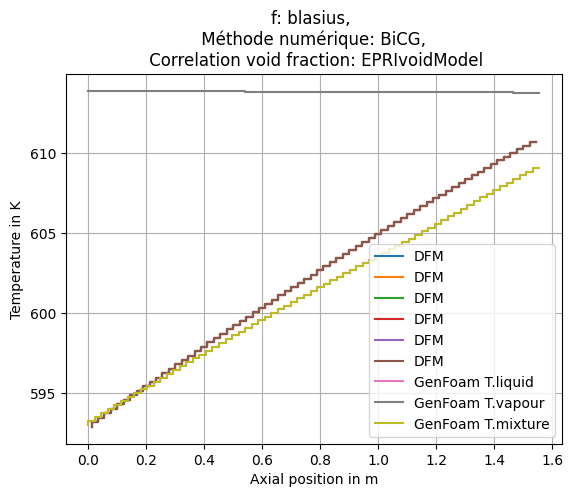

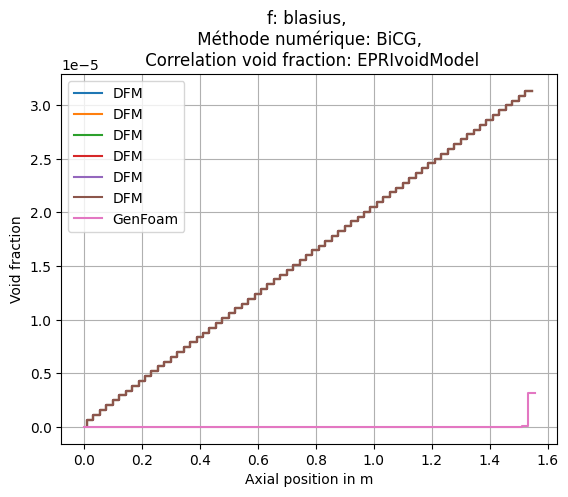

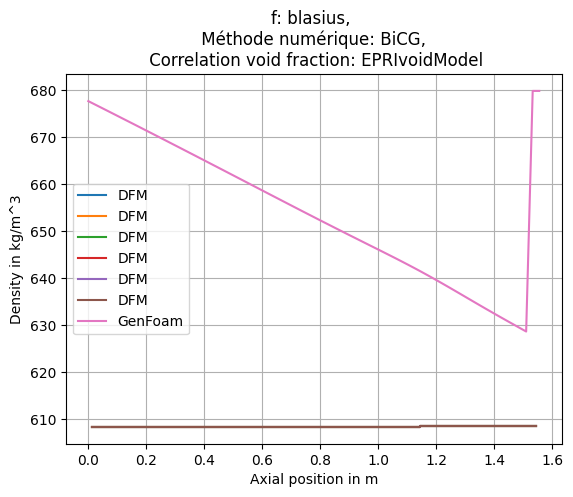

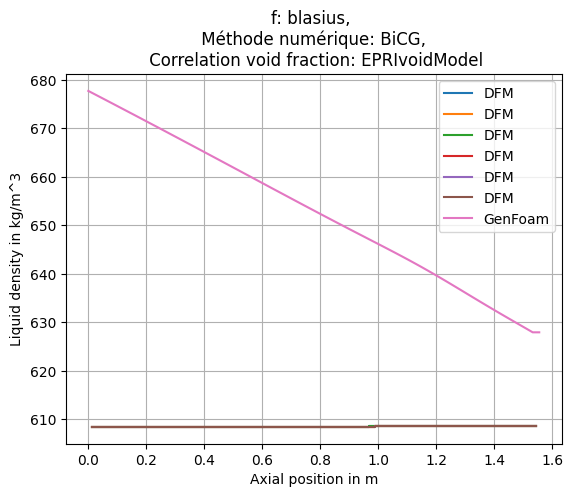

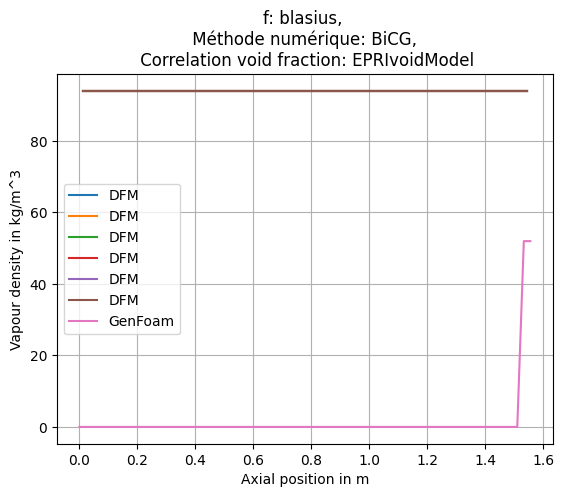

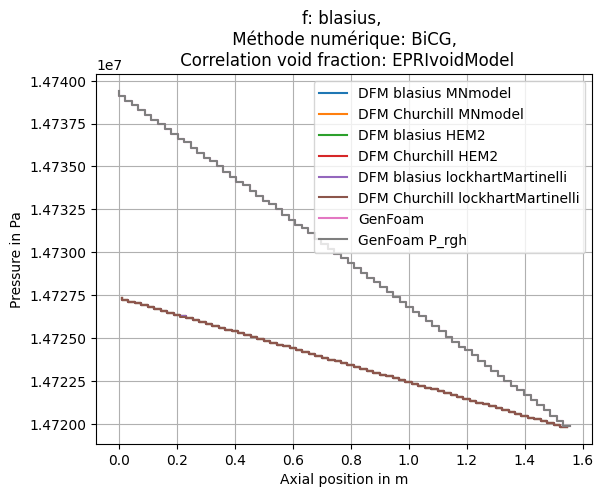

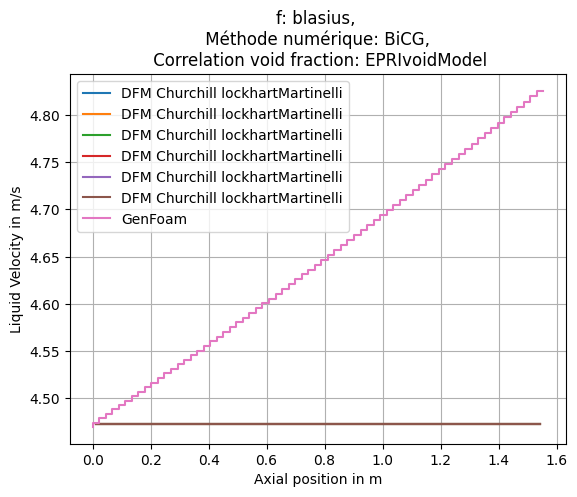

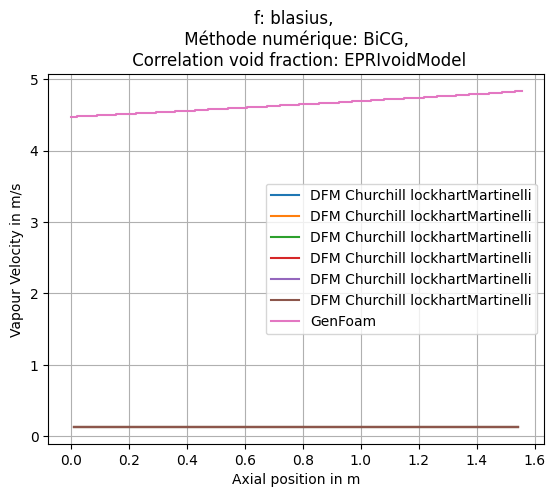

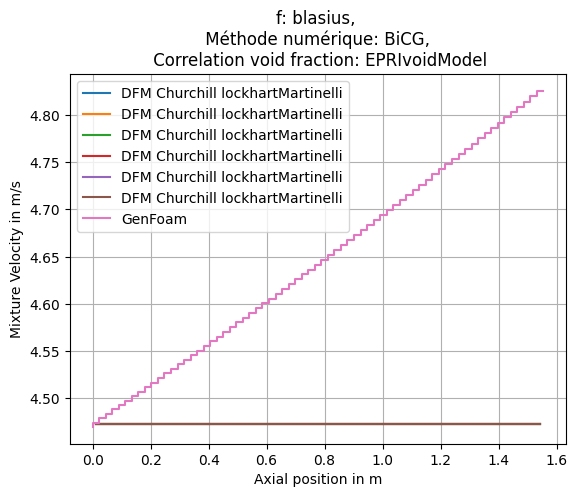

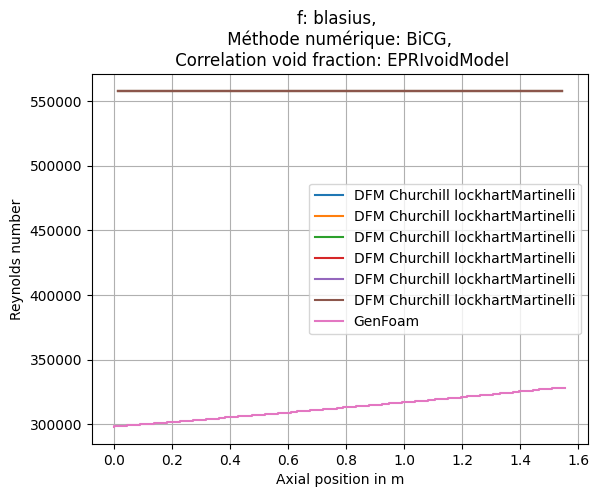

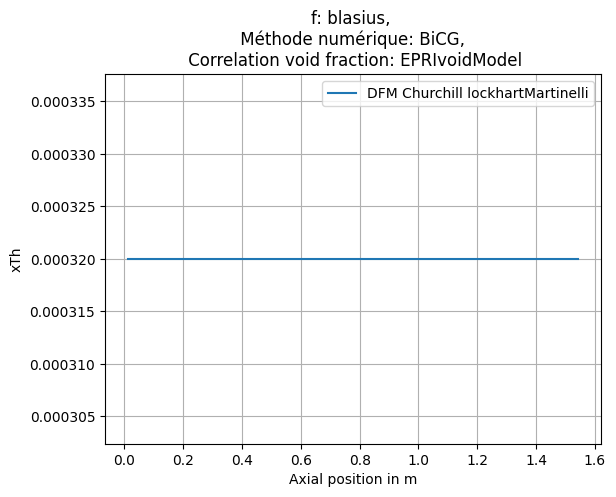

Mean relative error in temperature: 0.1591954067522199, max relative error in temperature 0.27003111506683736 for blasius, MNmodel
Mean relative error in temperature: 0.15919711662815553, max relative error in temperature 0.27003422279339623 for Churchill, MNmodel
Mean relative error in temperature: 0.1591954067522199, max relative error in temperature 0.27003111506683736 for blasius, HEM2
Mean relative error in temperature: 0.15919711662815553, max relative error in temperature 0.27003422279339623 for Churchill, HEM2
Mean relative error in temperature: 0.15919833729596974, max relative error in temperature 0.2700364441827474 for blasius, lockhartMartinelli
Mean relative error in temperature: 0.15921083530265298, max relative error in temperature 0.2700591697959265 for Churchill, lockhartMartinelli
[0.1591954067522199, 0.15919711662815553, 0.1591954067522199, 0.15919711662815553, 0.15919833729596974, 0.15921083530265298]
Reading files in directory: C:\Users\cleme\OneDrive\Documents\Pol

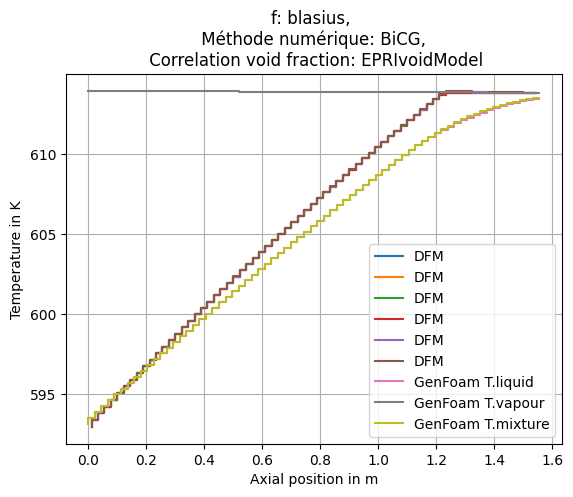

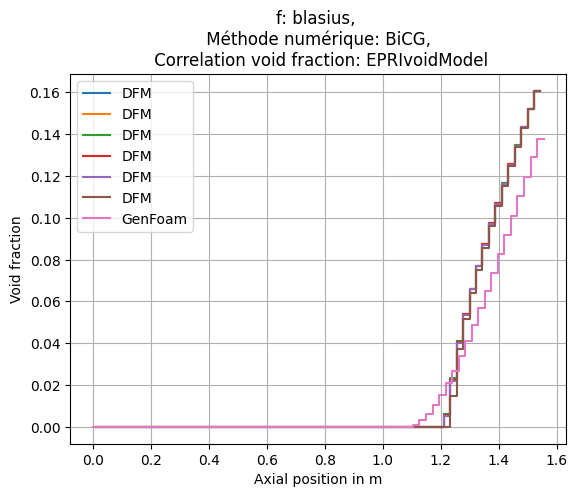

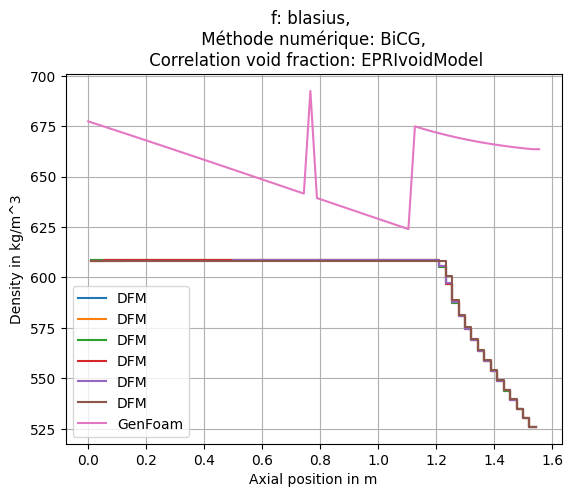

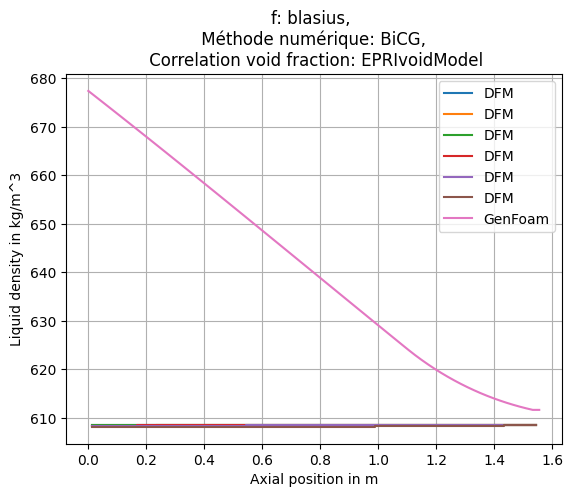

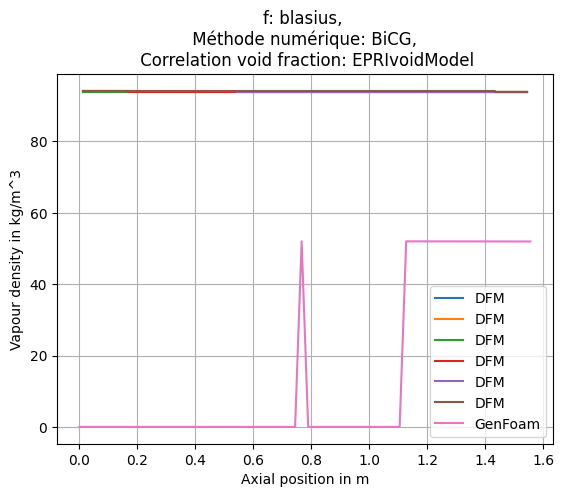

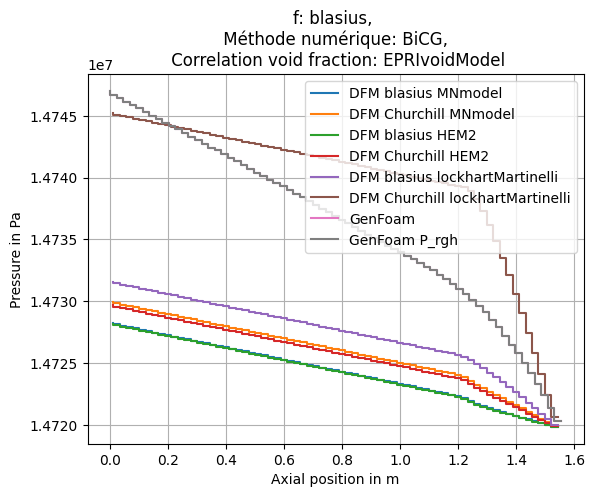

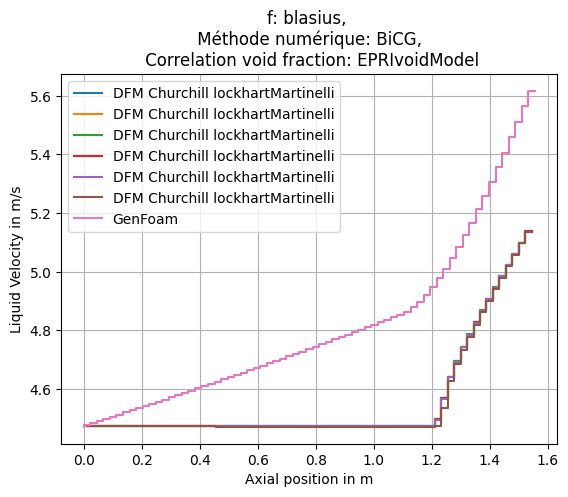

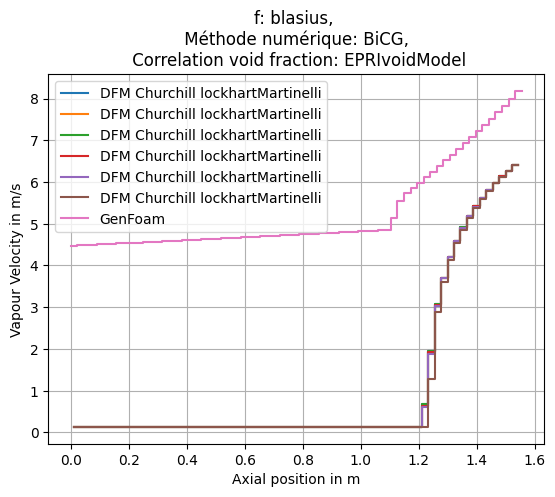

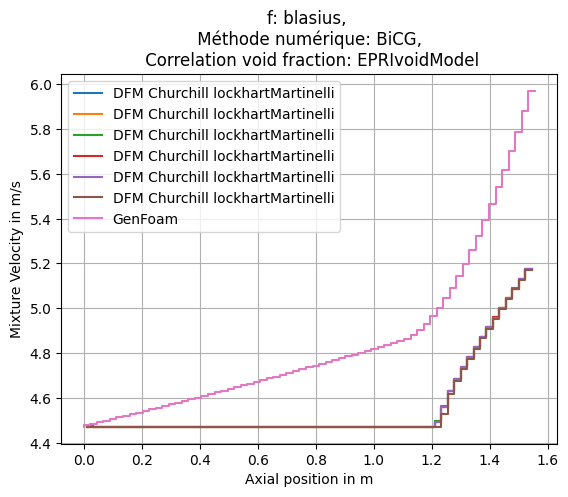

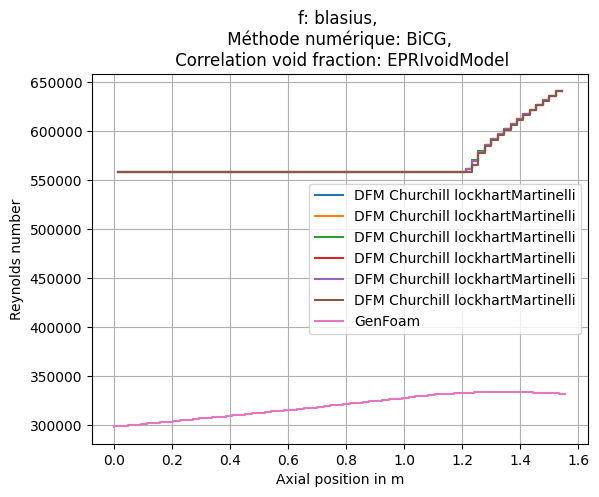

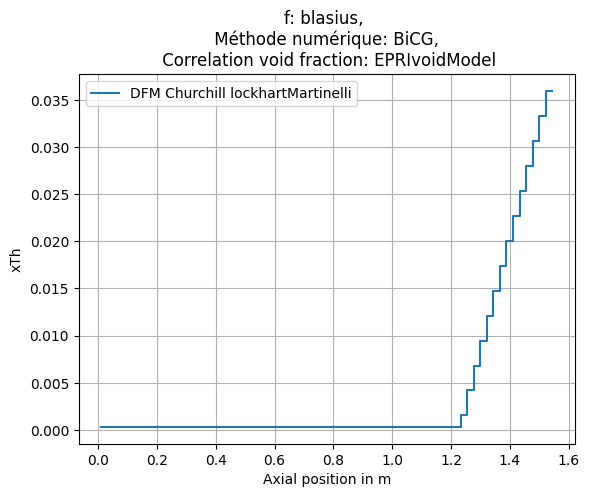

Mean relative error in temperature: 0.17262846525212253, max relative error in temperature 0.35084590552429734 for blasius, MNmodel
Mean relative error in temperature: 0.17291807422178782, max relative error in temperature 0.35175336214874026 for Churchill, MNmodel
Mean relative error in temperature: 0.1726170945907785, max relative error in temperature 0.35081402556697094 for blasius, HEM2
Mean relative error in temperature: 0.17286437228819437, max relative error in temperature 0.3516028372536729 for Churchill, HEM2
Mean relative error in temperature: 0.17322033401726383, max relative error in temperature 0.352607670919256 for blasius, lockhartMartinelli
Mean relative error in temperature: 0.17566152976338992, max relative error in temperature 0.35928530405630726 for Churchill, lockhartMartinelli
[0.17262846525212253, 0.17291807422178782, 0.1726170945907785, 0.17286437228819437, 0.17322033401726383, 0.17566152976338992]
Reading files in directory: C:\Users\cleme\OneDrive\Documents\Po

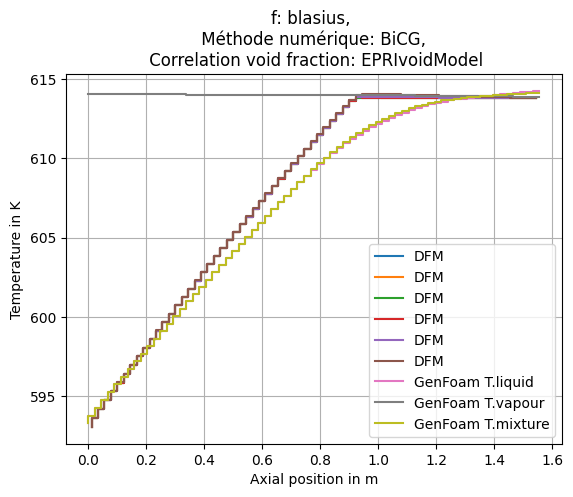

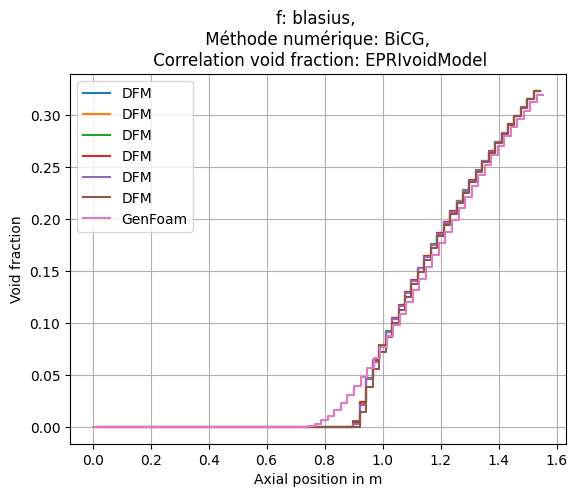

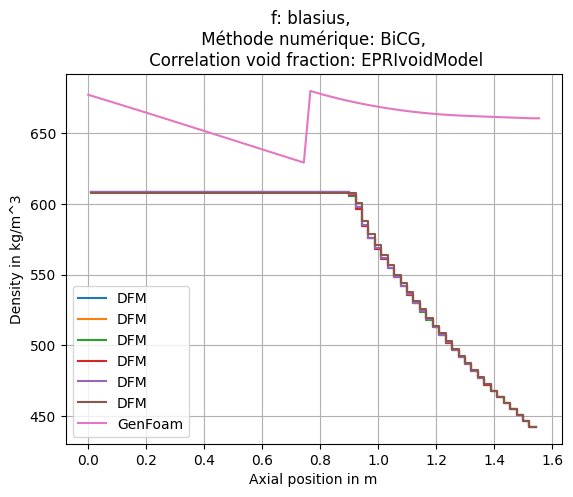

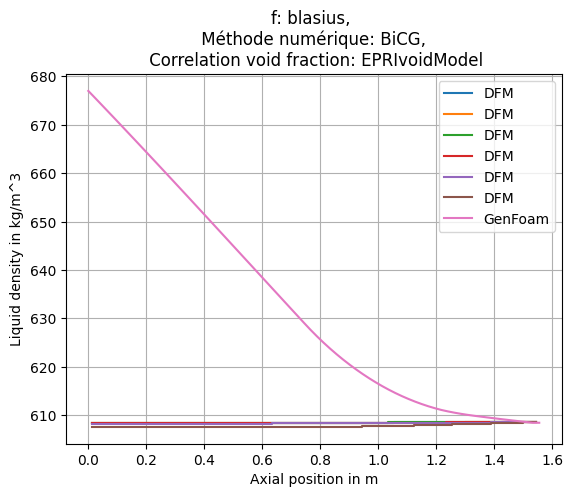

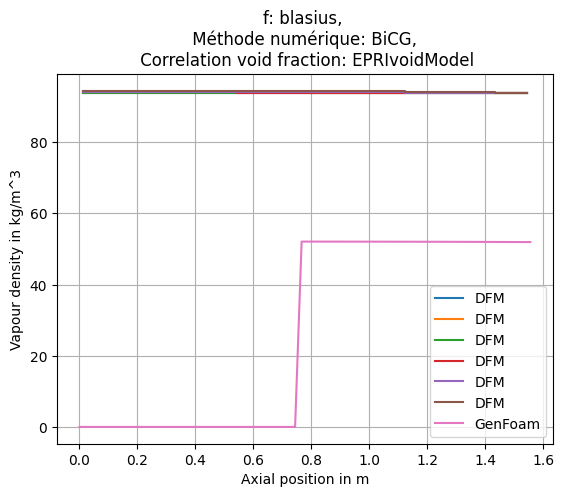

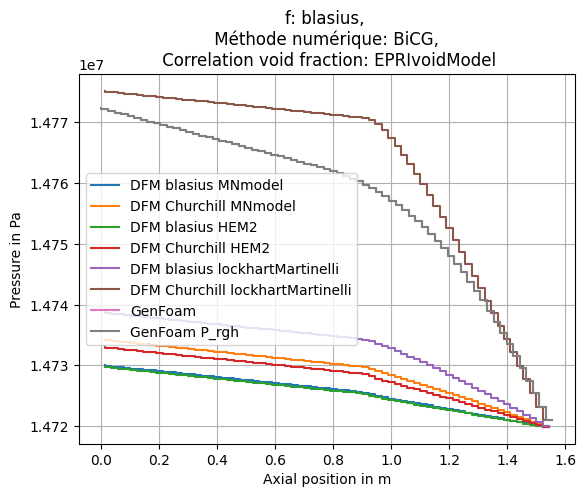

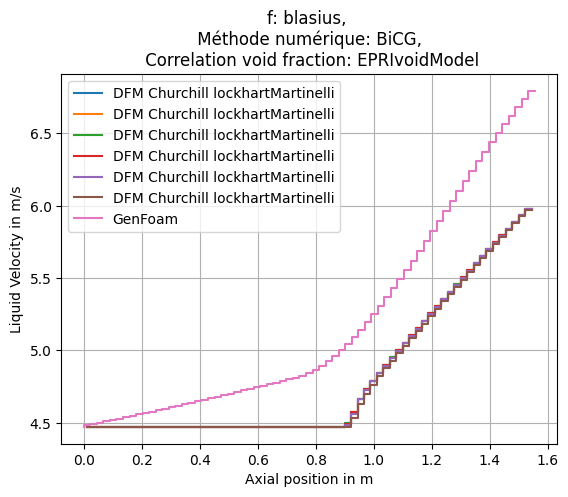

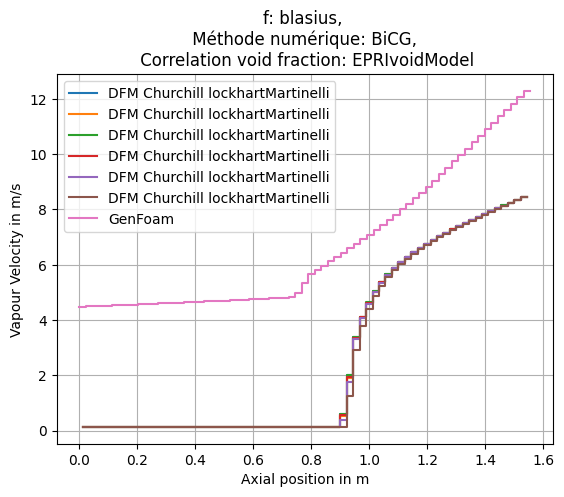

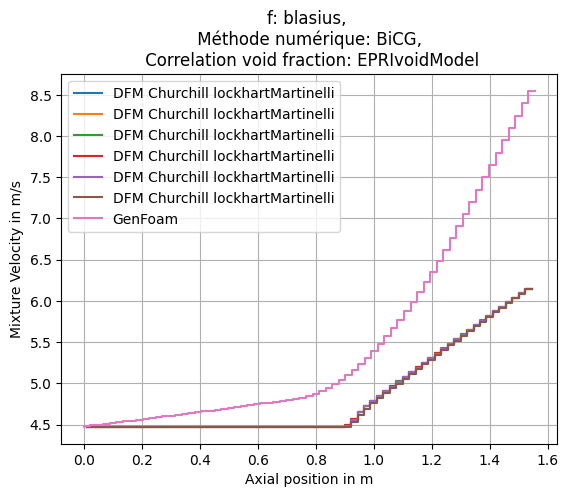

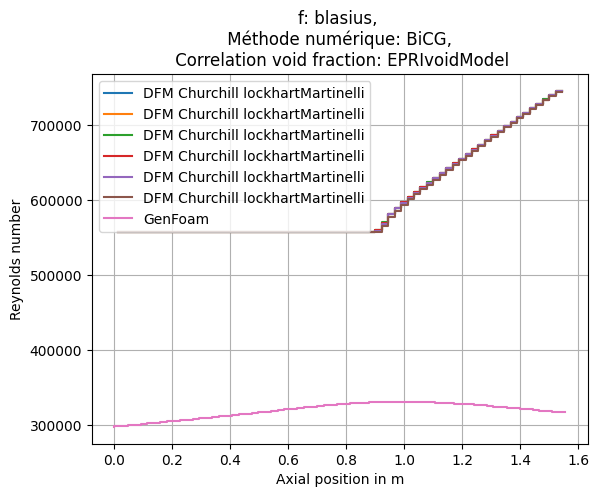

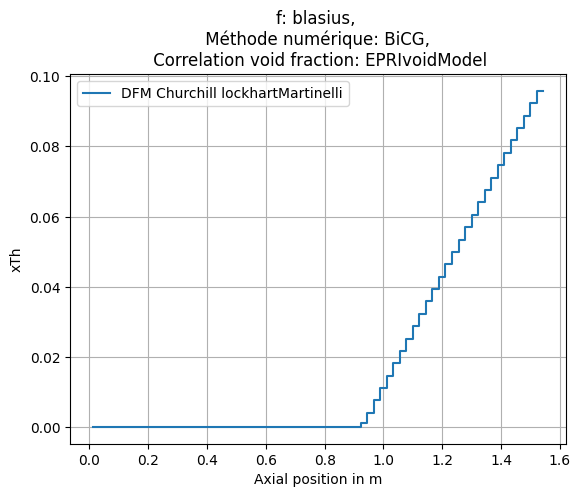

Mean relative error in temperature: 0.13978131964317536, max relative error in temperature 0.3790936893192351 for blasius, MNmodel
Mean relative error in temperature: 0.14054831315006186, max relative error in temperature 0.38130856879075403 for Churchill, MNmodel
Mean relative error in temperature: 0.1397364130429469, max relative error in temperature 0.37896317104508576 for blasius, HEM2
Mean relative error in temperature: 0.14031551693767966, max relative error in temperature 0.38068385285369327 for Churchill, HEM2
Mean relative error in temperature: 0.1414316161099075, max relative error in temperature 0.3837089391628974 for blasius, lockhartMartinelli
Mean relative error in temperature: 0.14851281734203228, max relative error in temperature 0.39286407544757856 for Churchill, lockhartMartinelli
[0.13978131964317536, 0.14054831315006186, 0.1397364130429469, 0.14031551693767966, 0.1414316161099075, 0.14851281734203228]
Reading files in directory: C:\Users\cleme\OneDrive\Documents\Pol

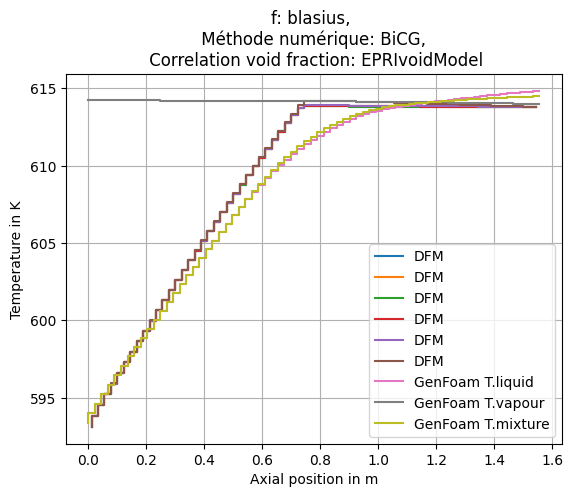

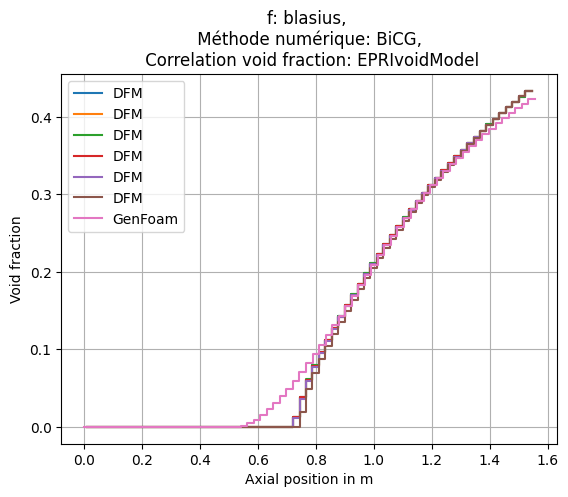

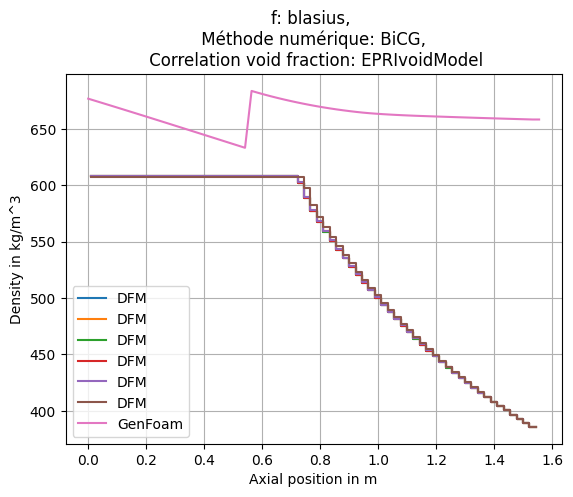

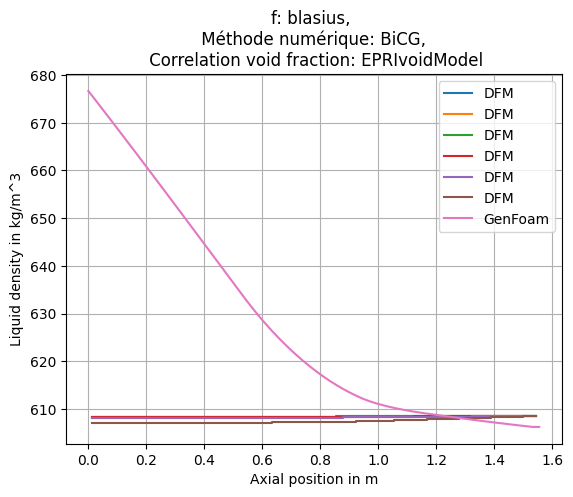

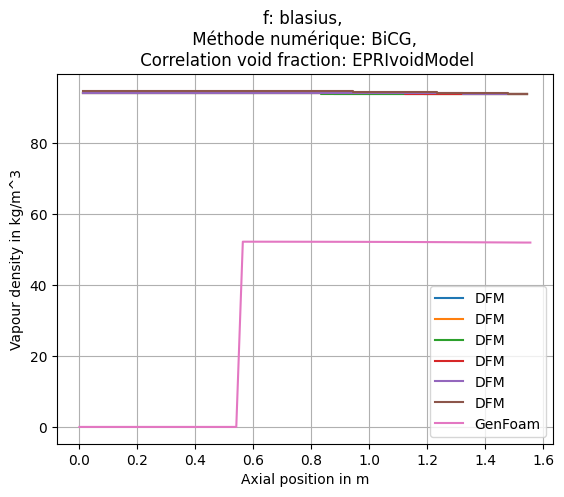

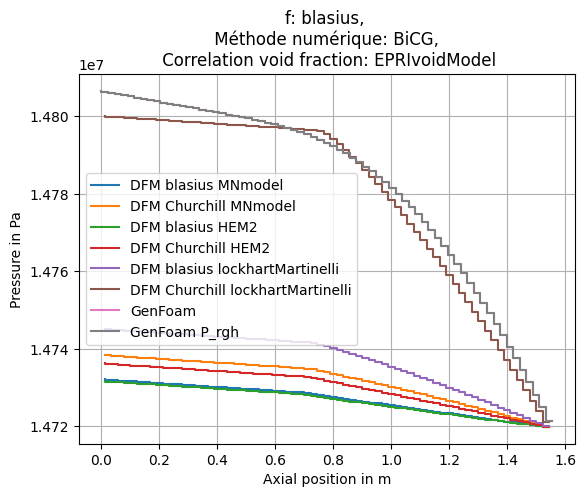

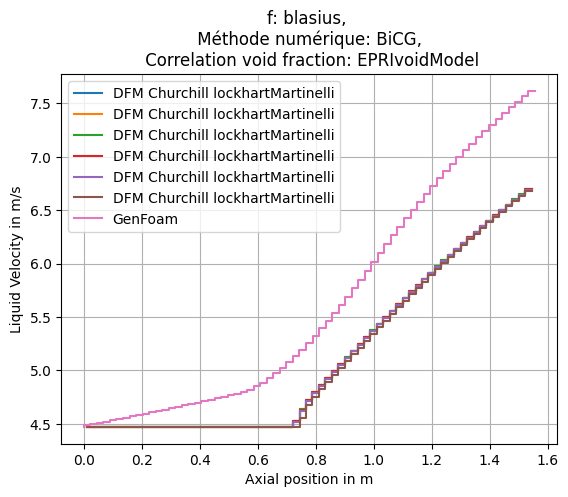

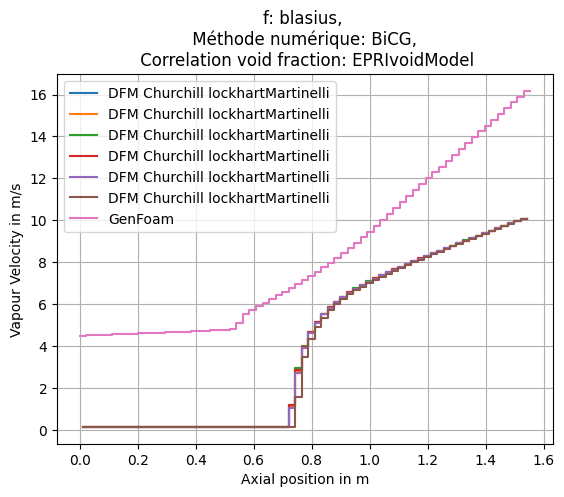

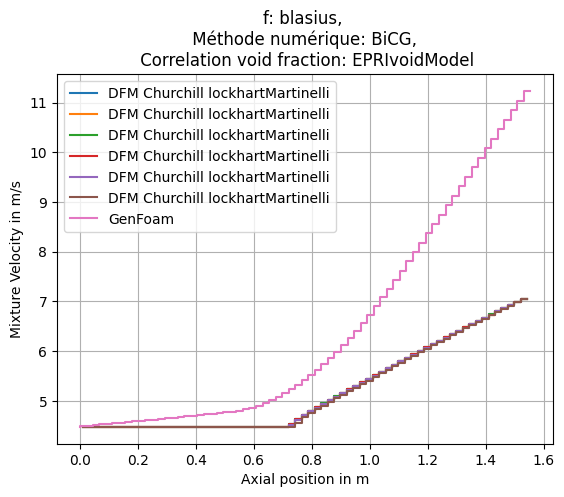

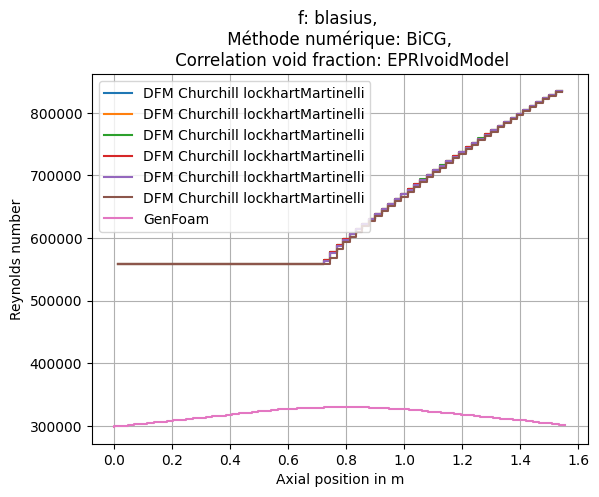

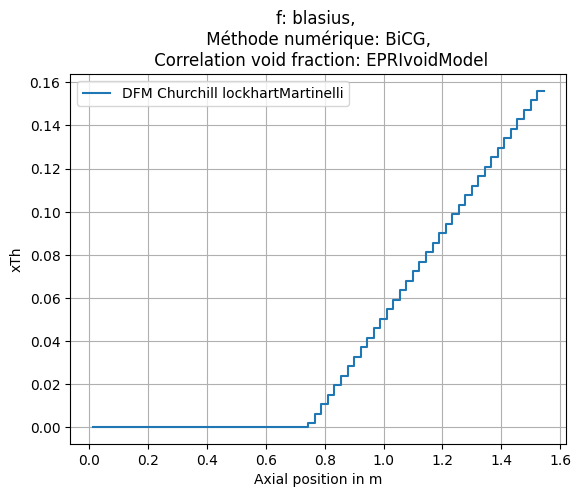

Mean relative error in temperature: 0.13323459638343899, max relative error in temperature 0.4000328819623377 for blasius, MNmodel
Mean relative error in temperature: 0.13378410866732676, max relative error in temperature 0.4033542631067007 for Churchill, MNmodel
Mean relative error in temperature: 0.13320363243145336, max relative error in temperature 0.3997962305313623 for blasius, HEM2
Mean relative error in temperature: 0.13359213067460657, max relative error in temperature 0.402207147424708 for Churchill, HEM2
Mean relative error in temperature: 0.13447254812701237, max relative error in temperature 0.4069133507627978 for blasius, lockhartMartinelli
Mean relative error in temperature: 0.14153415885972914, max relative error in temperature 0.4322897410053783 for Churchill, lockhartMartinelli
[0.13323459638343899, 0.13378410866732676, 0.13320363243145336, 0.13359213067460657, 0.13447254812701237, 0.14153415885972914]
Reading files in directory: C:\Users\cleme\OneDrive\Documents\Poly

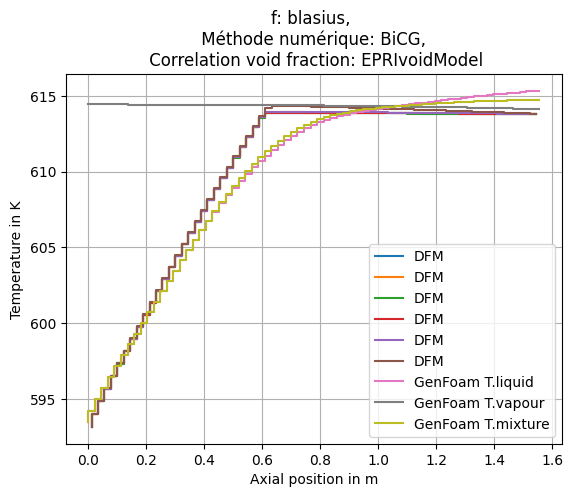

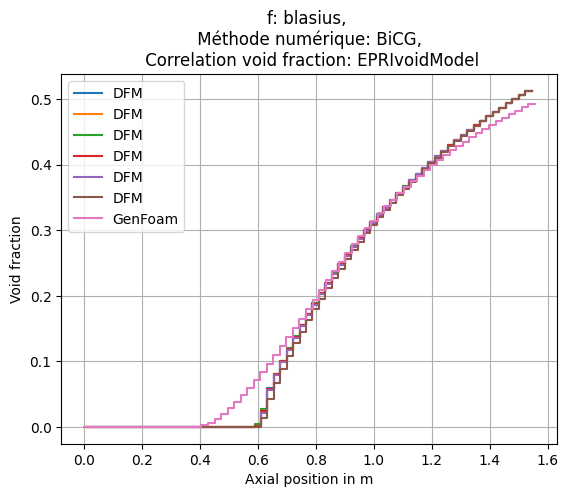

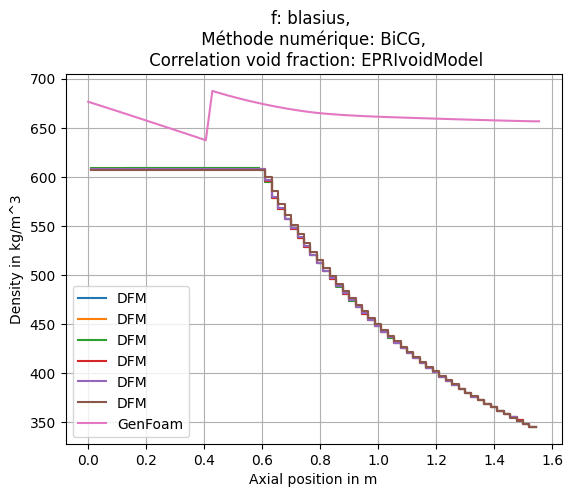

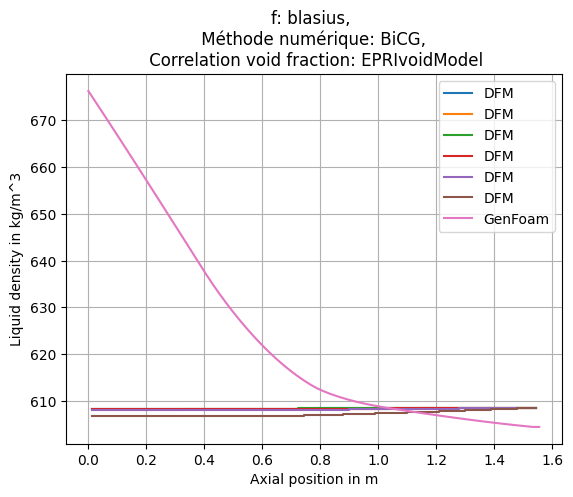

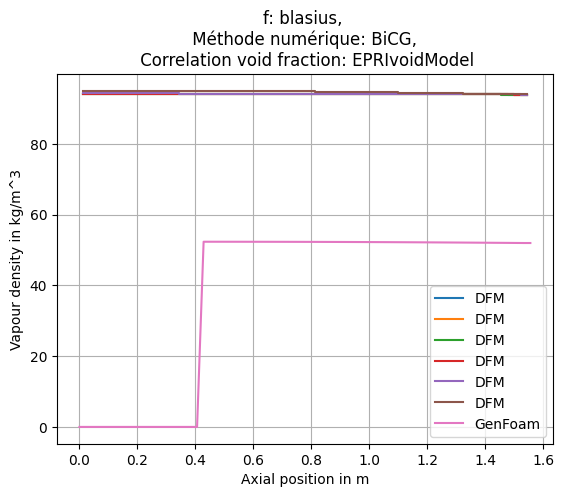

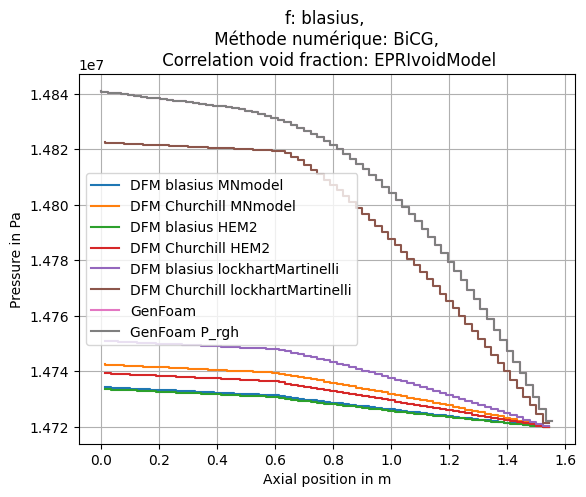

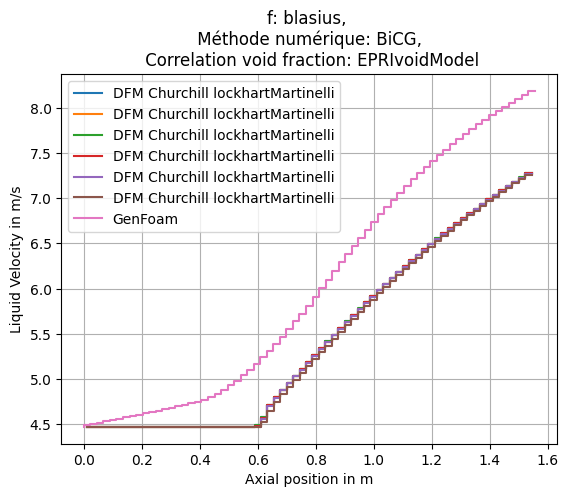

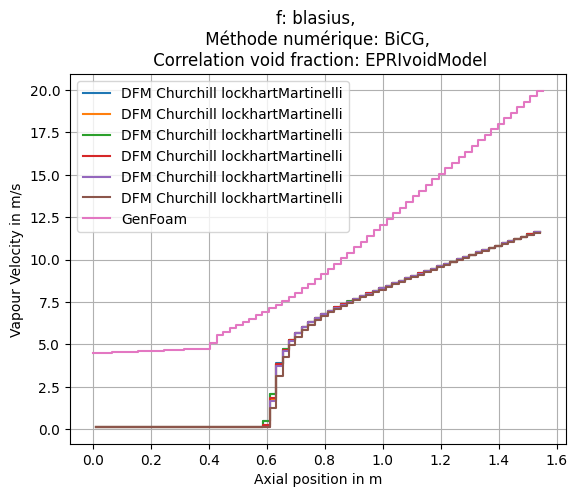

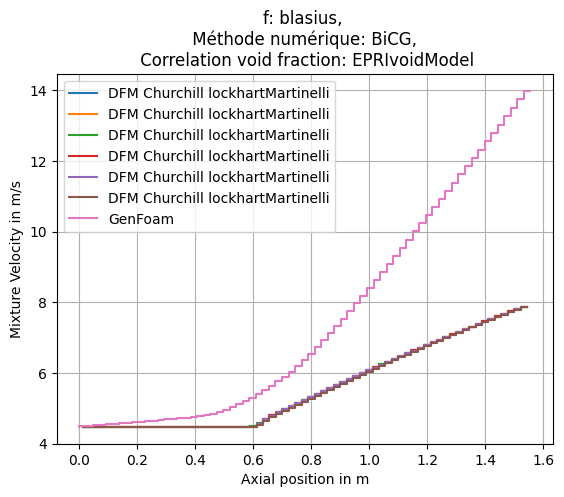

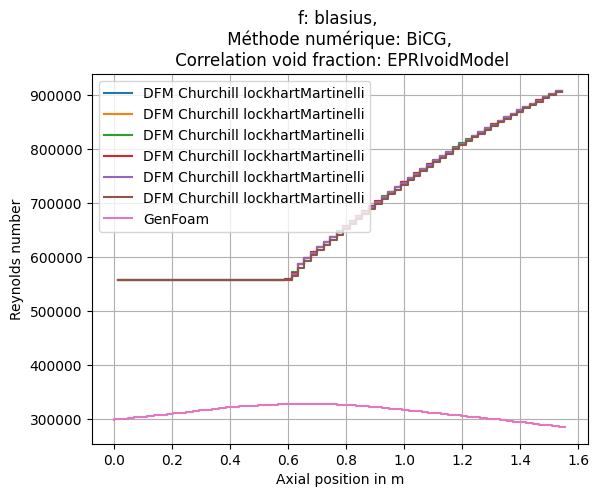

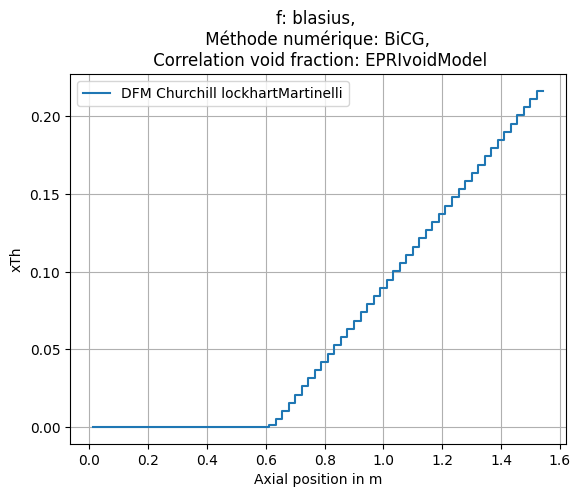

Mean relative error in temperature: 0.13924497503539934, max relative error in temperature 0.42789456207716875 for blasius, MNmodel
Mean relative error in temperature: 0.13932068832234837, max relative error in temperature 0.4314978519044453 for Churchill, MNmodel
Mean relative error in temperature: 0.13924736150996284, max relative error in temperature 0.4275560399748041 for blasius, HEM2
Mean relative error in temperature: 0.13935900604062057, max relative error in temperature 0.43059421736819103 for Churchill, HEM2
Mean relative error in temperature: 0.13950412129800627, max relative error in temperature 0.4329440303721049 for blasius, lockhartMartinelli
Mean relative error in temperature: 0.14364954868661722, max relative error in temperature 0.46225639873763563 for Churchill, lockhartMartinelli
[0.13924497503539934, 0.13932068832234837, 0.13924736150996284, 0.13935900604062057, 0.13950412129800627, 0.14364954868661722]
Reading files in directory: C:\Users\cleme\OneDrive\Documents\

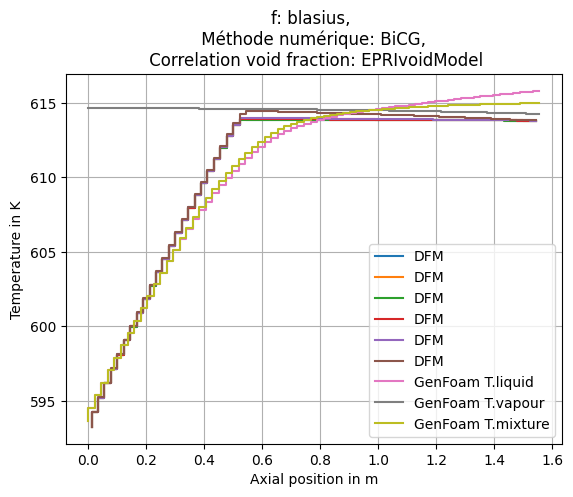

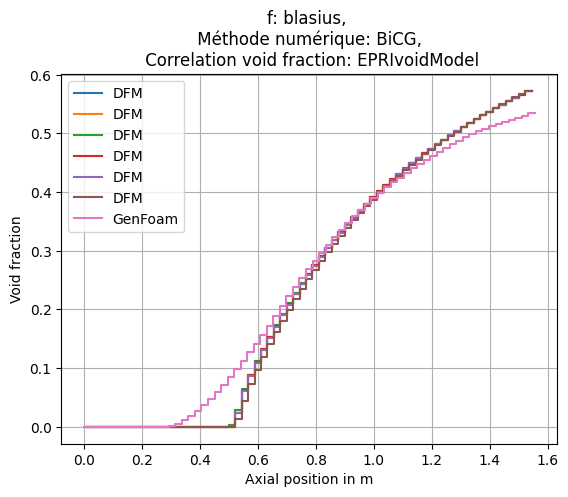

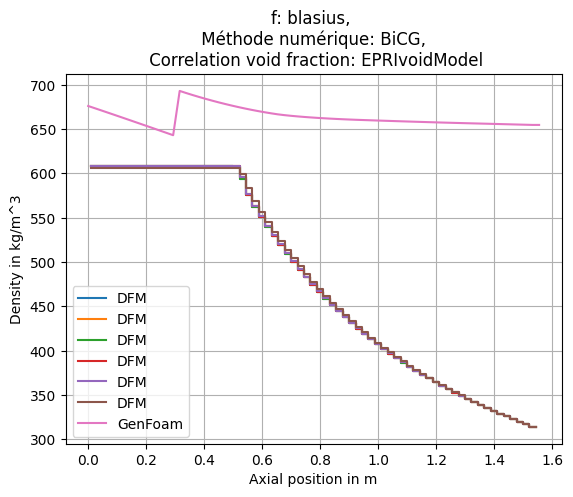

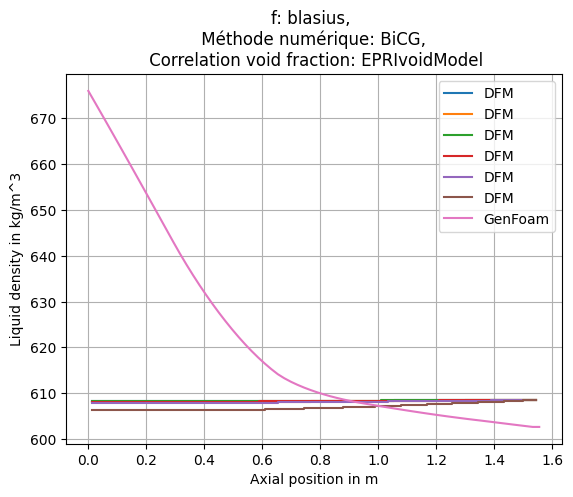

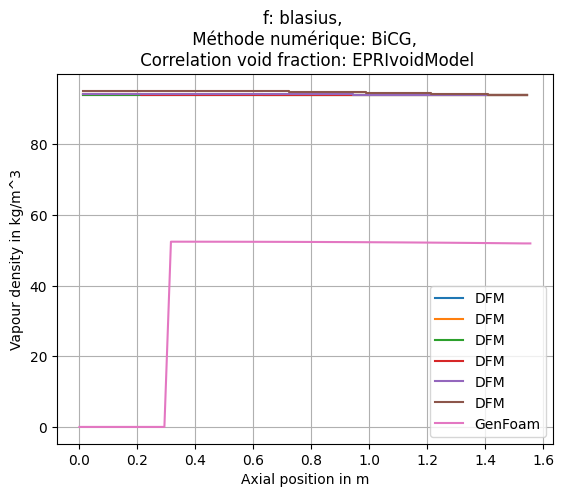

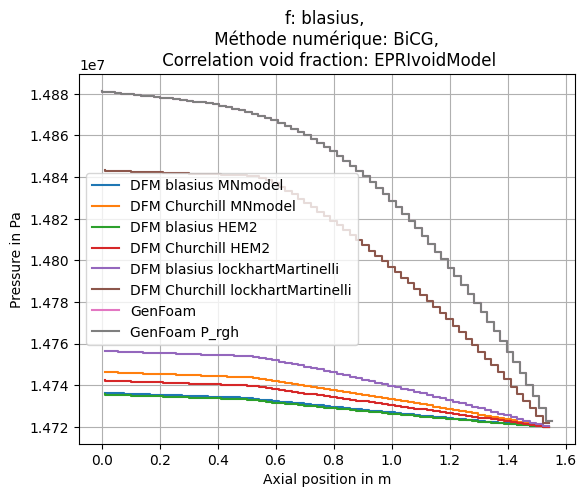

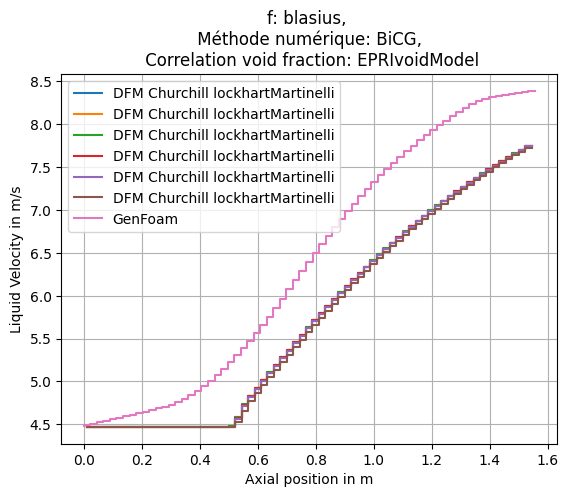

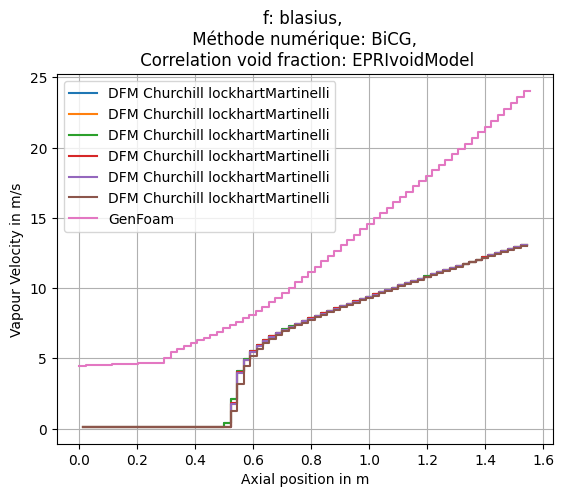

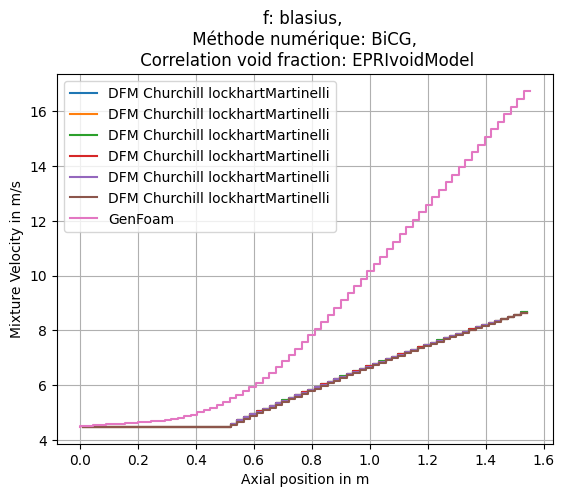

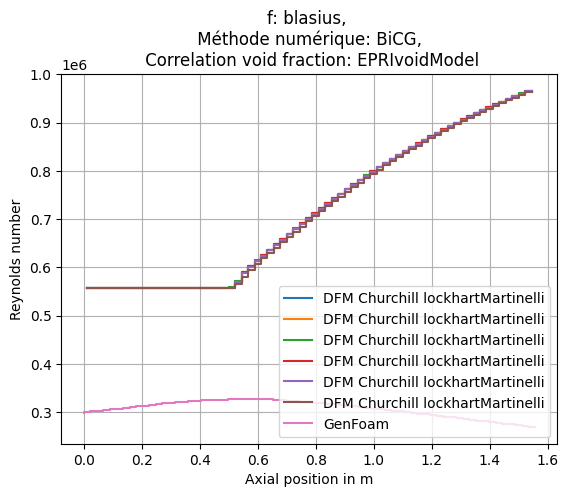

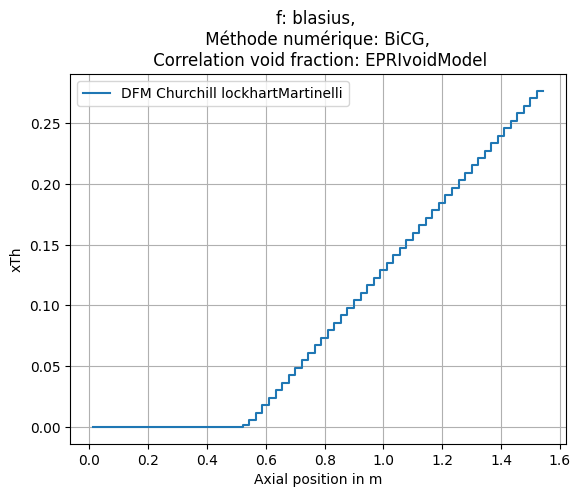

Mean relative error in temperature: 0.1522186005176357, max relative error in temperature 0.44761284858412365 for blasius, MNmodel
Mean relative error in temperature: 0.1517197913105755, max relative error in temperature 0.45059690643956557 for Churchill, MNmodel
Mean relative error in temperature: 0.15226823007351964, max relative error in temperature 0.44718071315758834 for blasius, HEM2
Mean relative error in temperature: 0.15201333817968812, max relative error in temperature 0.4499141008406145 for Churchill, HEM2
Mean relative error in temperature: 0.15125304241157783, max relative error in temperature 0.45231418042415705 for blasius, lockhartMartinelli
Mean relative error in temperature: 0.15121808862872682, max relative error in temperature 0.49015988297243557 for Churchill, lockhartMartinelli
[0.1522186005176357, 0.1517197913105755, 0.15226823007351964, 0.15201333817968812, 0.15125304241157783, 0.15121808862872682]
Reading files in directory: C:\Users\cleme\OneDrive\Documents\Po

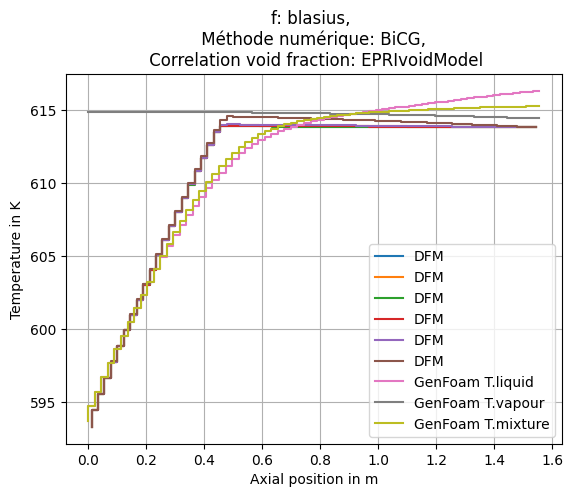

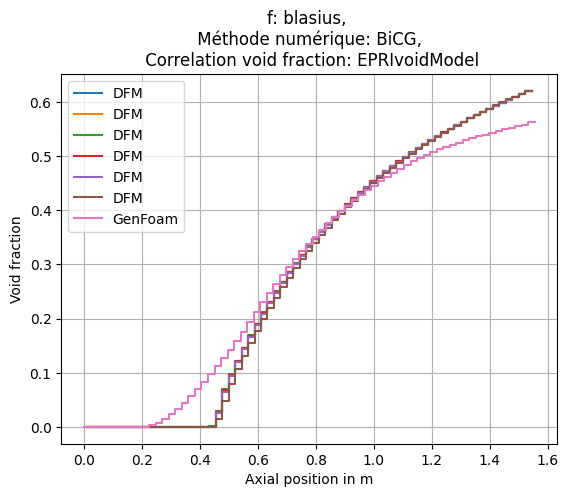

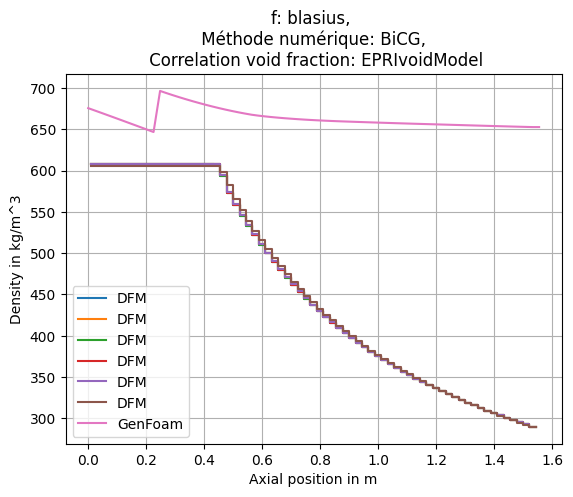

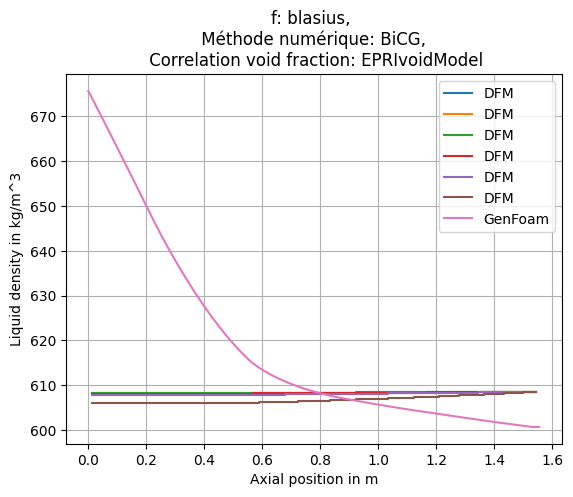

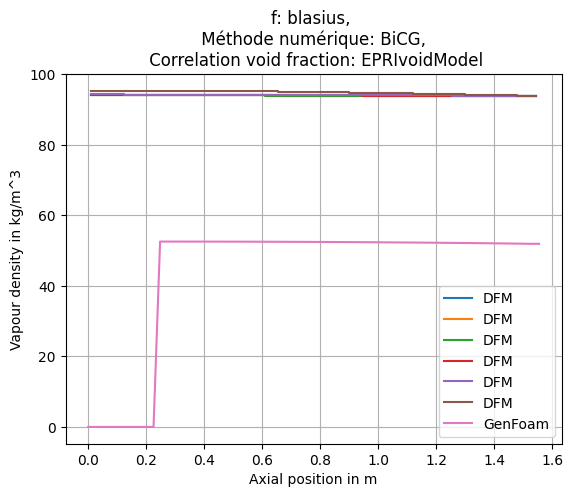

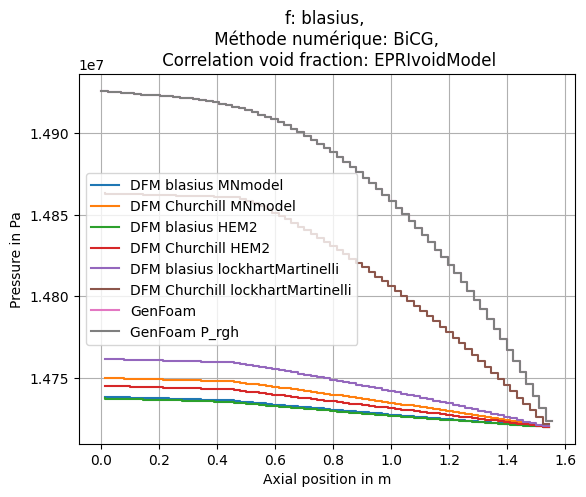

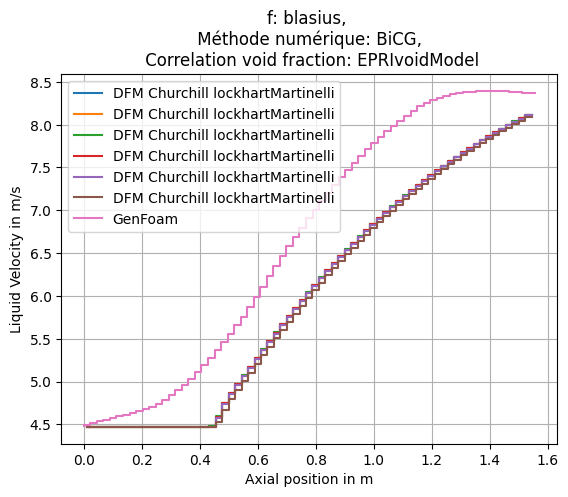

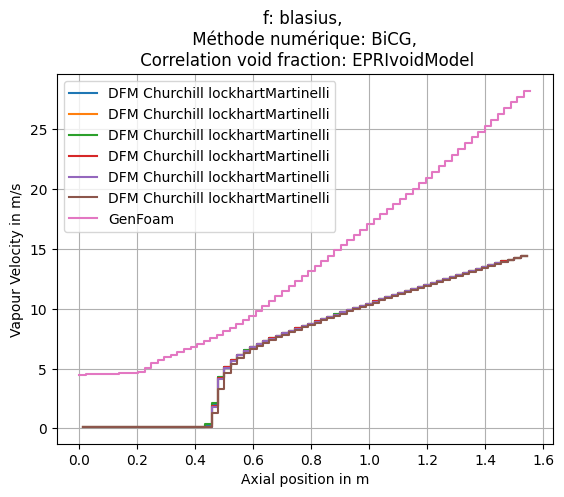

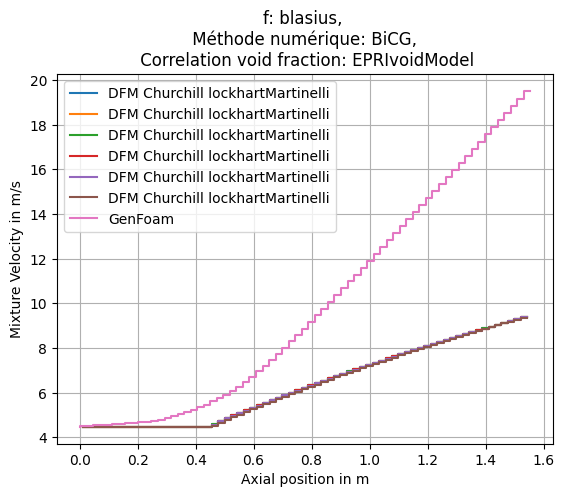

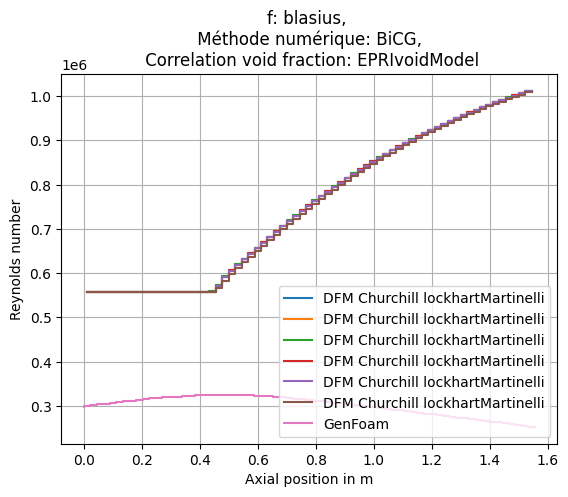

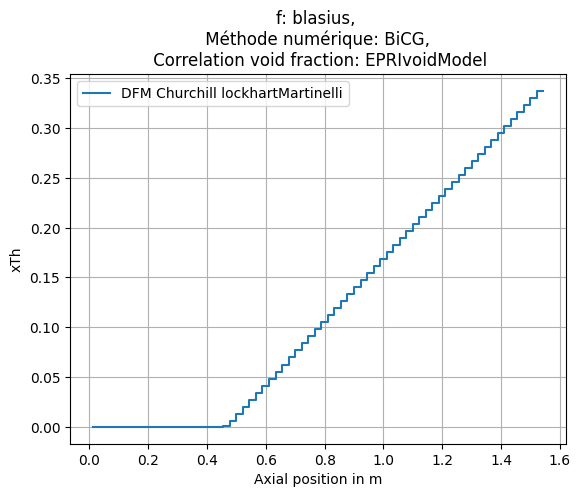

Mean relative error in temperature: 0.1719215952284726, max relative error in temperature 0.46276539066622063 for blasius, MNmodel
Mean relative error in temperature: 0.17070445000535406, max relative error in temperature 0.4651493326990329 for Churchill, MNmodel
Mean relative error in temperature: 0.17205316328119588, max relative error in temperature 0.4622401076107822 for blasius, HEM2
Mean relative error in temperature: 0.17130166917553807, max relative error in temperature 0.46432443012202945 for Churchill, HEM2
Mean relative error in temperature: 0.16958647240658728, max relative error in temperature 0.467121575975824 for blasius, lockhartMartinelli
Mean relative error in temperature: 0.16402367623022387, max relative error in temperature 0.5125656448089284 for Churchill, lockhartMartinelli
[0.1719215952284726, 0.17070445000535406, 0.17205316328119588, 0.17130166917553807, 0.16958647240658728, 0.16402367623022387]
Reading files in directory: C:\Users\cleme\OneDrive\Documents\Poly

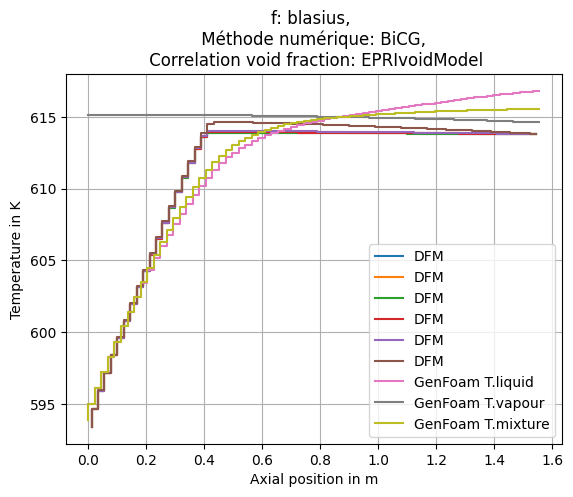

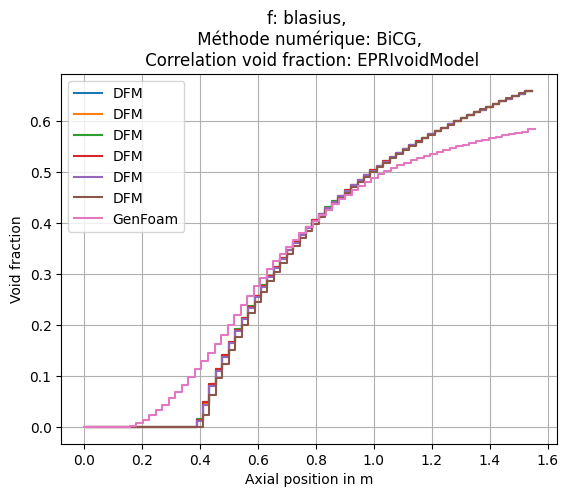

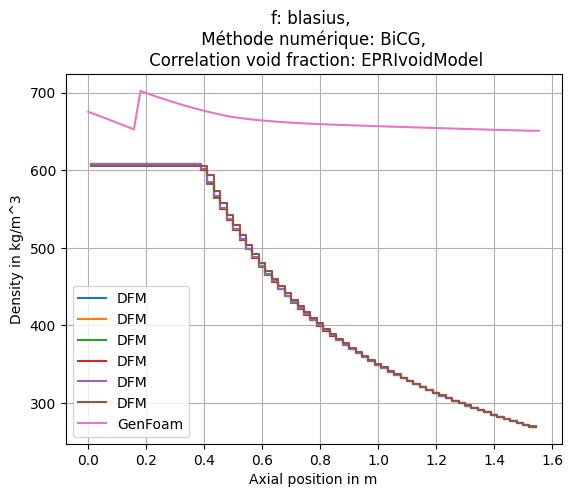

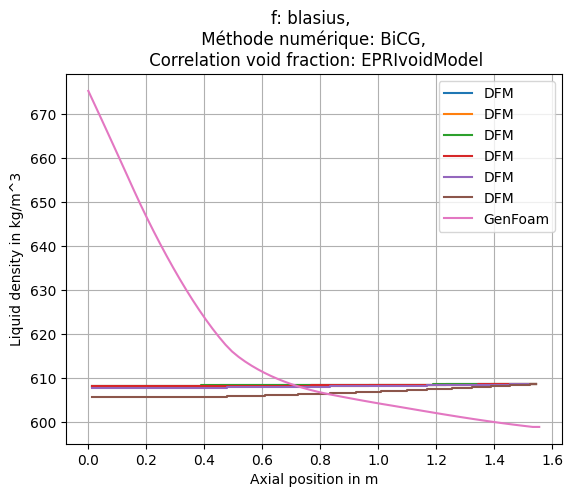

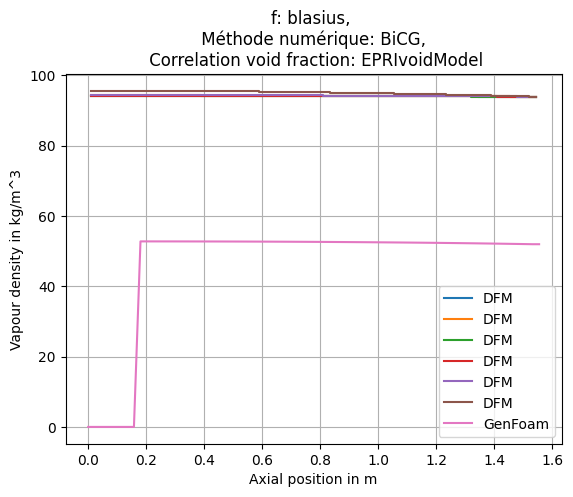

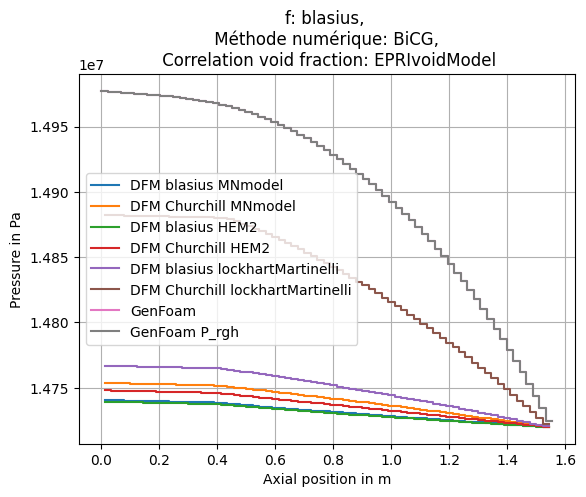

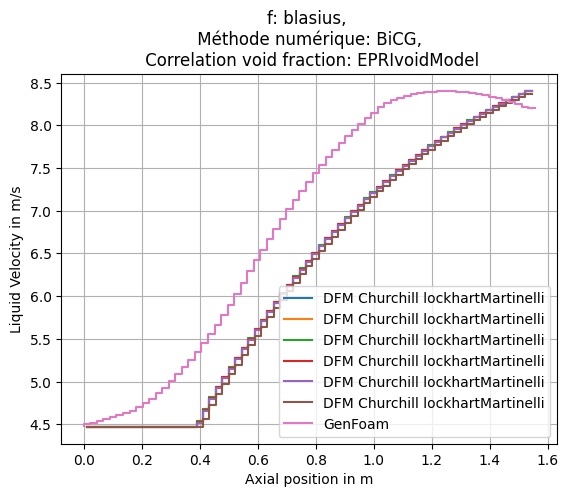

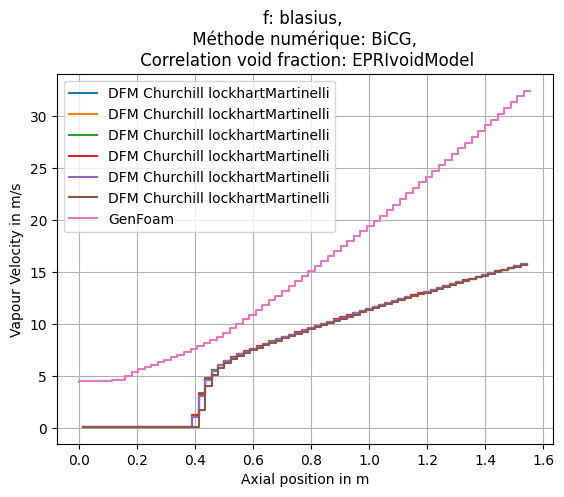

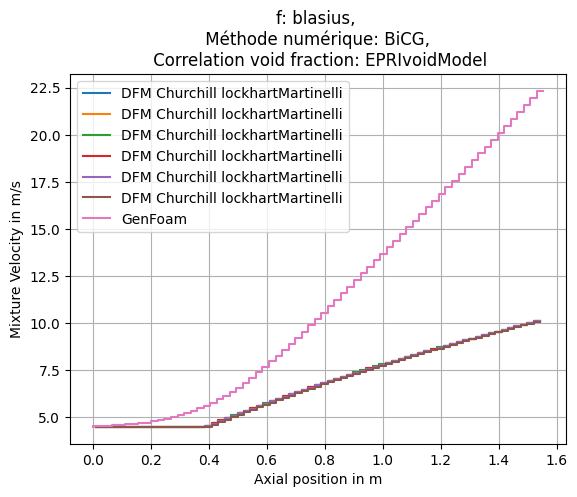

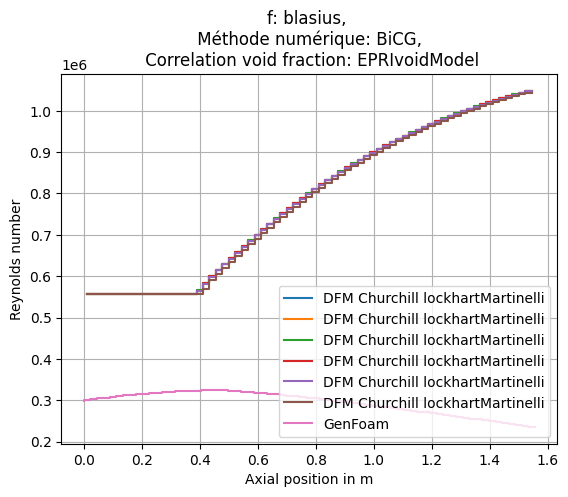

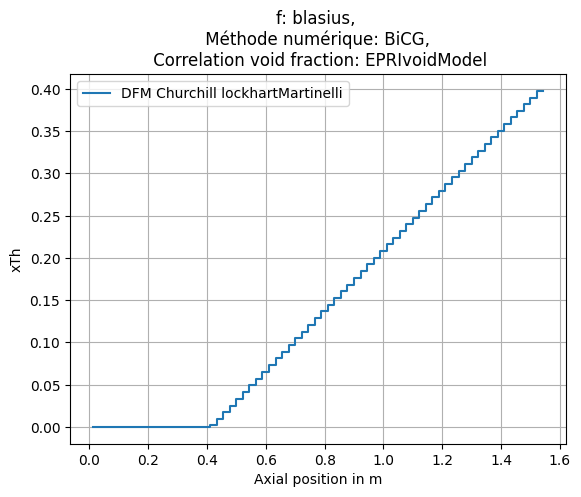

Mean relative error in temperature: 0.1967047951107163, max relative error in temperature 0.4671933933226262 for blasius, MNmodel
Mean relative error in temperature: 0.19468746741971715, max relative error in temperature 0.4741203069735864 for Churchill, MNmodel
Mean relative error in temperature: 0.19690247344276376, max relative error in temperature 0.4665895392870223 for blasius, HEM2
Mean relative error in temperature: 0.19564499415359898, max relative error in temperature 0.4711233090149224 for Churchill, HEM2
Mean relative error in temperature: 0.19299849054618215, max relative error in temperature 0.4810719224929217 for blasius, lockhartMartinelli
Mean relative error in temperature: 0.1814029558393395, max relative error in temperature 0.5261272146970828 for Churchill, lockhartMartinelli
[0.1967047951107163, 0.19468746741971715, 0.19690247344276376, 0.19564499415359898, 0.19299849054618215, 0.1814029558393395]
Reading files in directory: C:\Users\cleme\OneDrive\Documents\Poly\BW

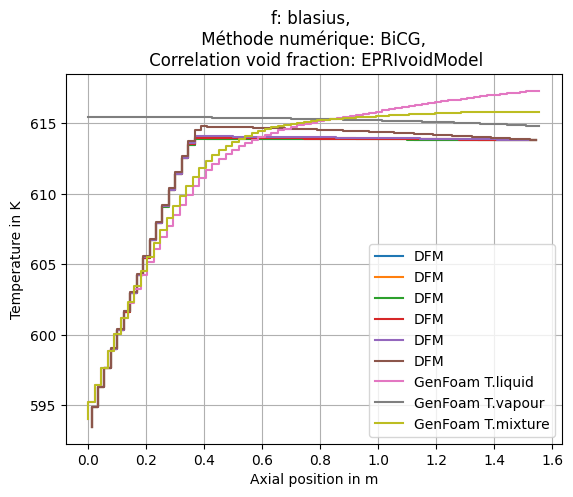

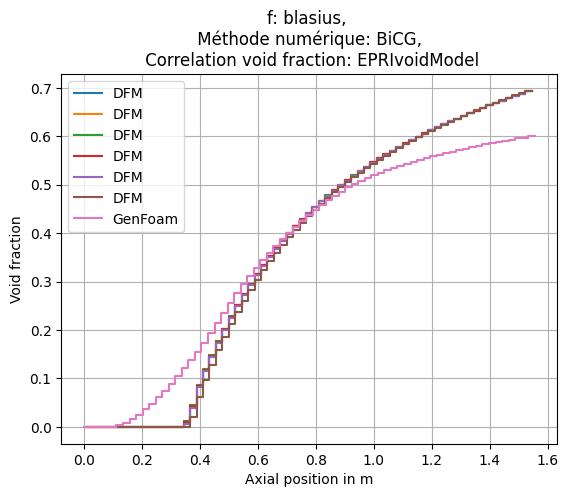

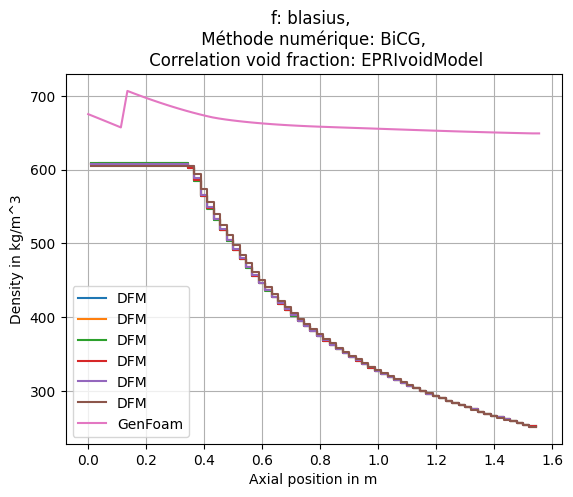

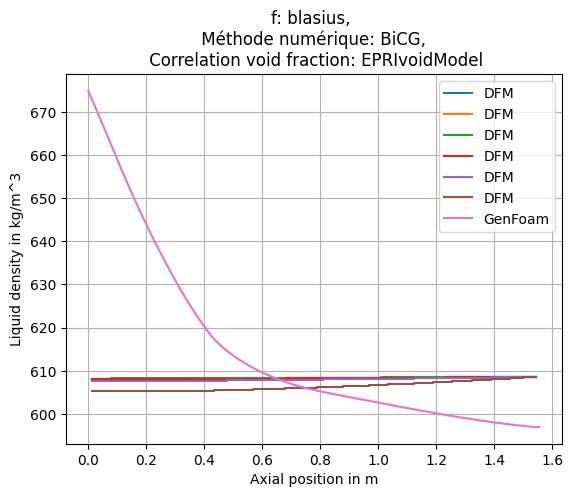

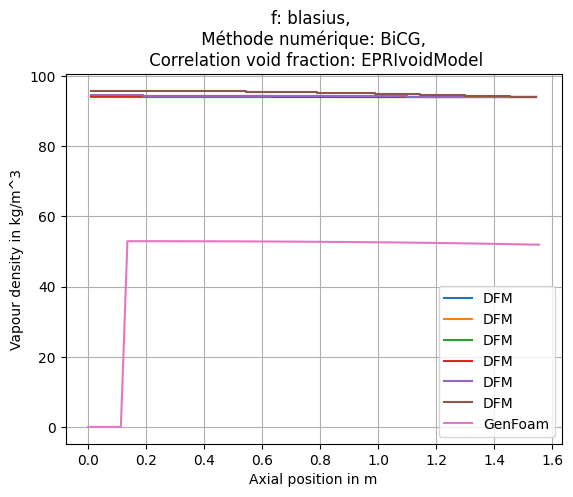

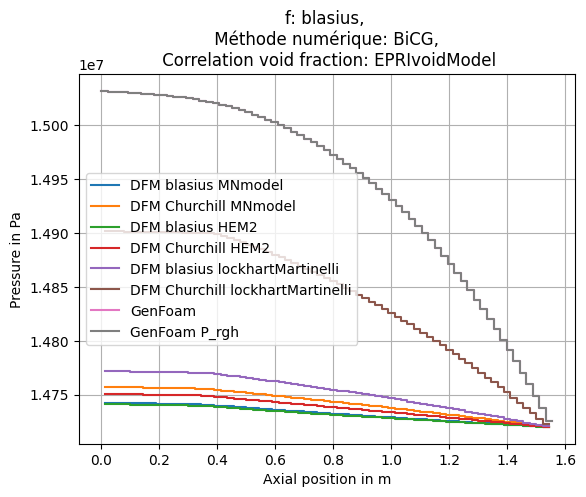

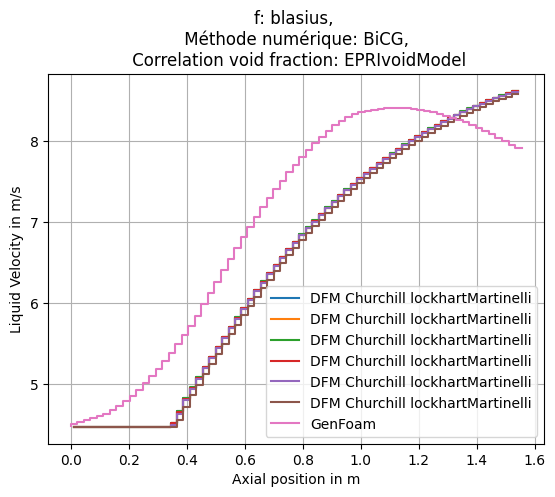

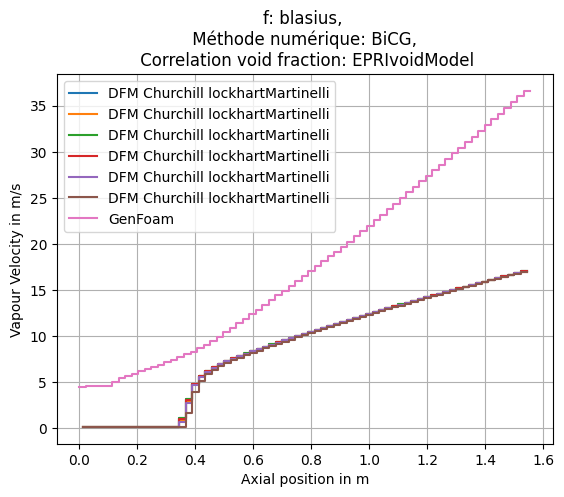

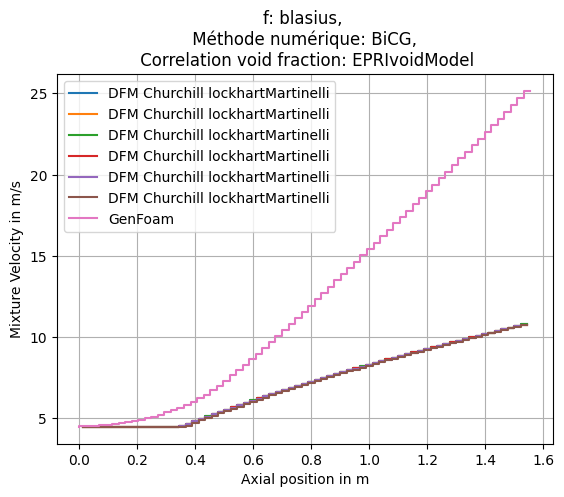

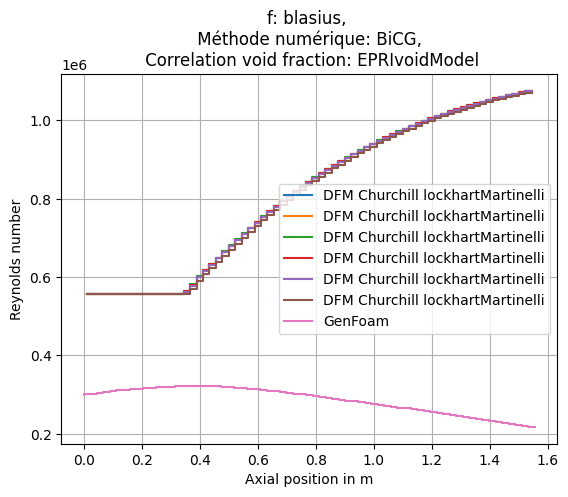

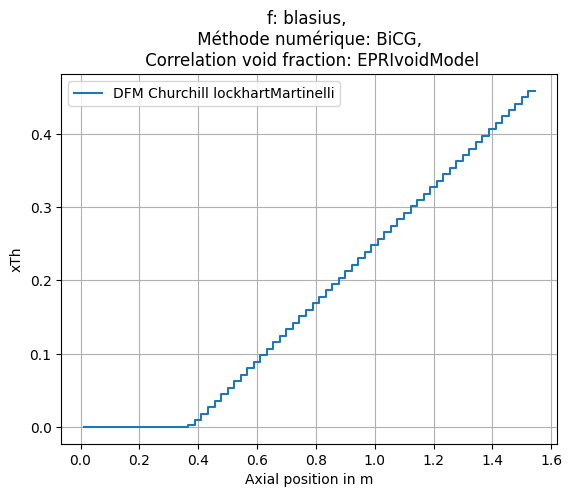

Mean relative error in temperature: 0.22584518532277081, max relative error in temperature 0.47684213665824077 for blasius, MNmodel
Mean relative error in temperature: 0.22322858127549156, max relative error in temperature 0.4845530890952781 for Churchill, MNmodel
Mean relative error in temperature: 0.2261223129010143, max relative error in temperature 0.4761623533656791 for blasius, HEM2
Mean relative error in temperature: 0.22447358129407632, max relative error in temperature 0.48116506533794406 for Churchill, HEM2
Mean relative error in temperature: 0.22065852650613044, max relative error in temperature 0.4923177401305066 for blasius, lockhartMartinelli
Mean relative error in temperature: 0.2020479243943323, max relative error in temperature 0.5417430661453649 for Churchill, lockhartMartinelli
[0.22584518532277081, 0.22322858127549156, 0.2261223129010143, 0.22447358129407632, 0.22065852650613044, 0.2020479243943323]
Reading files in directory: C:\Users\cleme\OneDrive\Documents\Poly\

" #plotter.plotCase()\nprint(f'Umixture GeN-Foam: {plotter.U_mixture}')\nprint(f'zlist Plotter: {plotter.zList}')\nprint(f'len zListplotter: {len(plotter.zList)}')\nprint(f'zList convection: {case0.convection_sol.z_mesh}')\nprint(f'len z list convection {len(case0.convection_sol.z_mesh)}')\n#print(f'rhoua: {plotter.rhoUA}')  \nprint(f'rhoL GeN-Foam: {case0.convection_sol.rhoL[-1]}')\nprint(f'rhoG GeN-Foam: {case0.convection_sol.rhoG[-1]}')\nprint(f'rho GeN-Foam: {case0.convection_sol.rho[-1]}') "

In [12]:
errors_p=[]
for i in range(len(caseMerge)):
    plotter = GFPlotter(caseMerge[i], rf'C:\Users\cleme\OneDrive\Documents\Poly\BWR\driftFluxModel\thermalHydraulicsPoro\Phase_I_Qvariation\{1+i/2}GW', f"Qvariation_{qFiss[i]}GW")
    #plotter.plotComparison()
    plotter.computeErrors()
    errors_p.append(plotter.plotErrorsPressure())

errors_T=[]
for i in range(len(caseMerge)):
    plotter = GFPlotter(caseMerge[i], rf'C:\Users\cleme\OneDrive\Documents\Poly\BWR\driftFluxModel\thermalHydraulicsPoro\Phase_I_Qvariation\{1+i/2}GW', f"Qvariation_{qFiss[i]}GW")
    plotter.plotComparison()
    plotter.computeErrors()
    errors_T.append(plotter.plotErrorsTemperature())

errors_eps=[]
for i in range(len(caseMerge)):
    plotter = GFPlotter(caseMerge[i], rf'C:\Users\cleme\OneDrive\Documents\Poly\BWR\driftFluxModel\thermalHydraulicsPoro\Phase_I_Qvariation\{1+i/2}GW', f"Qvariation_{qFiss[i]}GW")
    #plotter.plotComparison()
    plotter.computeErrors()
    errors_eps.append(plotter.plotErrorsVoidFraction())


""" #plotter.plotCase()
print(f'Umixture GeN-Foam: {plotter.U_mixture}')
print(f'zlist Plotter: {plotter.zList}')
print(f'len zListplotter: {len(plotter.zList)}')
print(f'zList convection: {case0.convection_sol.z_mesh}')
print(f'len z list convection {len(case0.convection_sol.z_mesh)}')
#print(f'rhoua: {plotter.rhoUA}')  
print(f'rhoL GeN-Foam: {case0.convection_sol.rhoL[-1]}')
print(f'rhoG GeN-Foam: {case0.convection_sol.rhoG[-1]}')
print(f'rho GeN-Foam: {case0.convection_sol.rho[-1]}') """

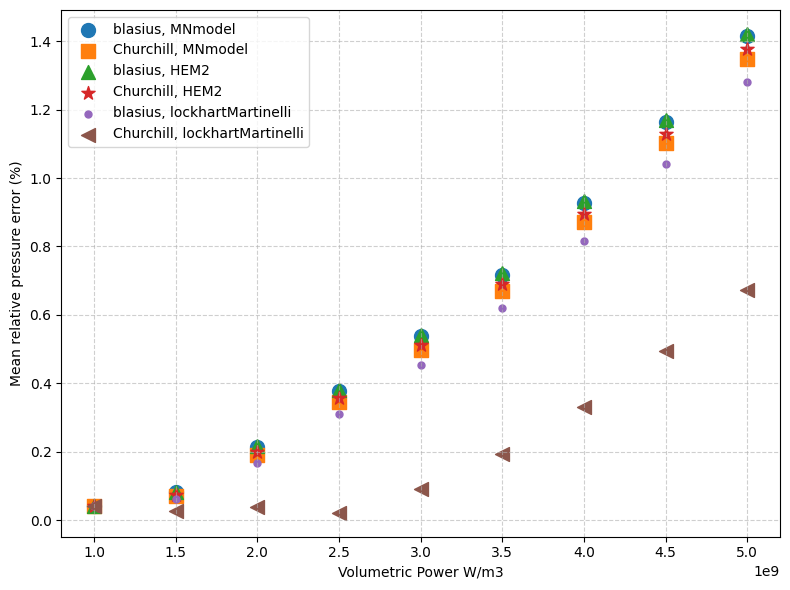

blasius, MNmodel erreurs: [0.04179839712659865, 0.0816434606782405, 0.21492360872515098, 0.3770921438045724, 0.5378995846220865, 0.7175469657284547, 0.9270044105482684, 1.1630220807111282, 1.4149868610611769]
RMS error pressure: 0.608435279222853
Max error pressure: 1.4149868610611769
Churchill, MNmodel erreurs: [0.04179875893358898, 0.07113788538405899, 0.19168064406926819, 0.34424808550537606, 0.4967454139951622, 0.6690115763106834, 0.8717040006837742, 1.1014116299563004, 1.3473393818417252]
RMS error pressure: 0.5705641529644375
Max error pressure: 1.3473393818417252
blasius, HEM2 erreurs: [0.04179839712659865, 0.08202263282098365, 0.2163502033458336, 0.37953901854007344, 0.5412567824512676, 0.7217165142861175, 0.9318987215990918, 1.168566986951938, 1.4211217625683075]
RMS error pressure: 0.611585668854468
Max error pressure: 1.4211217625683075
Churchill, HEM2 erreurs: [0.04179875893358898, 0.07292821511301943, 0.19851116632718477, 0.35610042123574065, 0.513118141903438, 0.689570654

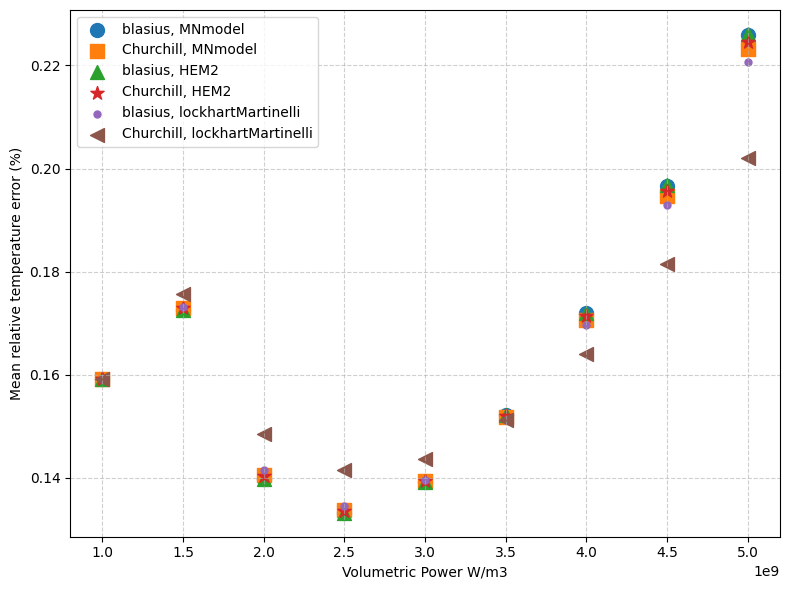

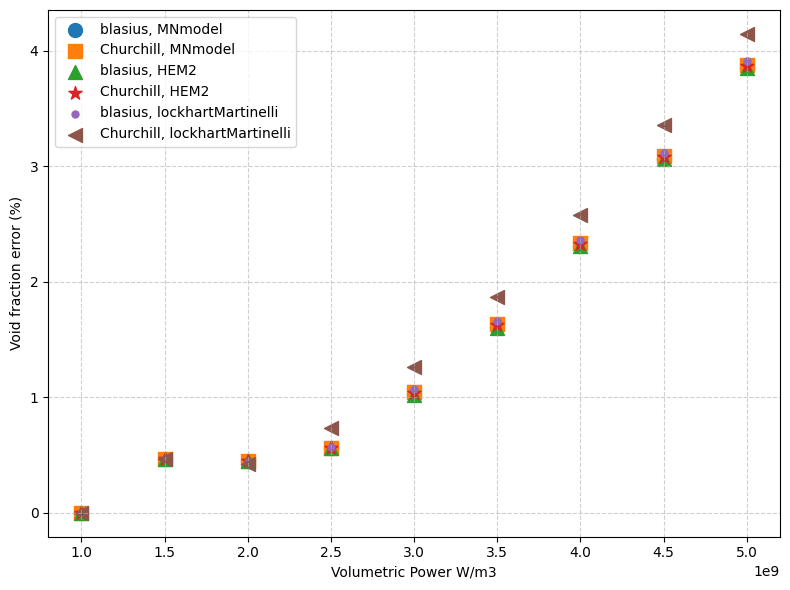

In [17]:
# Symboles pour chaque cas
markers = ['o', 's', '^', '*', '.', '<']  # Cercle, carré, triangle, étoile

cases = {
}

for i in range(len(caseMerge[0])):
    cases[f'{caseMerge[0][i].convection_sol.frfaccorel}, {caseMerge[0][i].convection_sol.P2Pcorel}'] = [errors_p[j][i] for j in range(len(errors_p))]

# Création du graphique
plt.figure(figsize=(8, 6))

for (case_name, errors), marker in zip(cases.items(), markers):
    plt.scatter(qFiss, errors, label=case_name, marker=marker, s=100)

# Ajout des légendes et étiquettes
#plt.title("Erreur moyenne par puissance pour chaque combinaison \n de facteur de friction de multiplicateur biphasique")
plt.xlabel("Volumetric Power W/m3")
plt.ylabel("Mean relative pressure error (%)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Affichage du graphique
plt.show()


for (case_name, errors), marker in zip(cases.items(), markers):
    print(f'{case_name} erreurs: {errors}')
    #RMS ERROR:
    rms_eps = (np.mean(np.sqrt(np.array(errors)**2)))
    max_error = (np.max(errors))
    #print
    print(f'RMS error pressure: {rms_eps}')
    print(f'Max error pressure: {max_error}')

cases = {
}

for i in range(len(caseMerge[0])):
    cases[f'{caseMerge[0][i].convection_sol.frfaccorel}, {caseMerge[0][i].convection_sol.P2Pcorel}'] = [errors_T[j][i] for j in range(len(errors_T))]

# Création du graphique
plt.figure(figsize=(8, 6))

for (case_name, errors), marker in zip(cases.items(), markers):
    plt.scatter(qFiss, errors, label=case_name, marker=marker, s=100)

# Ajout des légendes et étiquettes
#plt.title("Erreur moyenne sur la temparature par puissance pour chaque combinaison \n de facteur de friction de multiplicateur biphasique")
plt.xlabel("Volumetric Power W/m3")
plt.ylabel("Mean relative temperature error (%)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

cases = {
}

for i in range(len(caseMerge[0])):
    cases[f'{caseMerge[0][i].convection_sol.frfaccorel}, {caseMerge[0][i].convection_sol.P2Pcorel}'] = [errors_eps[j][i] for j in range(len(errors_eps))]

# Création du graphique
plt.figure(figsize=(8, 6))

for (case_name, errors), marker in zip(cases.items(), markers):
    plt.scatter(qFiss, errors, label=case_name, marker=marker, s=100)

# Ajout des légendes et étiquettes
#plt.title("Erreur moyenne sur la fraction de vide par puissance pour chaque combinaison \n de facteur de friction de multiplicateur biphasique")
plt.xlabel("Volumetric Power W/m3")
plt.ylabel("Void fraction error (%)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
""" blasius, MNmodel erreurs: [6158.153090839168, 12033.441356871224, 31727.010399299914, 55777.681055136985, 79723.1557210128, 106585.11994610589, 138044.1193554164, 173681.7931835661, 211951.6094324142]
RMS error void fraction: 113608.33191190497
Max error void fraction: 211951.6094324142
Churchill, MNmodel erreurs: [6158.206395476285, 10485.161689778604, 28295.87800133835, 50919.35591790003, 73623.15206813902, 99374.76620127306, 129807.51269398651, 164478.65043553384, 201815.22225094677]
RMS error void fraction: 107222.30958347426
Max error void fraction: 201815.22225094677
blasius, HEM2 erreurs: [6158.153090839168, 12089.321492242441, 31937.594998908364, 56139.6010164408, 80220.73007315423, 107204.48807609151, 138773.0294592001, 174510.0044308607, 212870.80619153622]
RMS error void fraction: 114168.28835721065
Max error void fraction: 212870.80619153622
Churchill, HEM2 erreurs: [6158.206395476285, 10749.009805736318, 29304.15356733227, 52672.440766800726, 76049.74785429673, 102428.69217981845, 133424.68737910842, 168611.84646300285, 206422.7505906351]
RMS error void fraction: 110002.14099537273
Max error void fraction: 206422.7505906351
blasius, lockhartMartinelli erreurs: [6158.255575581002, 8993.398206541873, 24527.15457240375, 45706.923688982, 67323.18059926009, 92110.99980437306, 121606.95850458994, 155318.3032820204, 191630.62031258235]
RMS error void fraction: 100808.22209139615
Max error void fraction: 191630.62031258235
Churchill, lockhartMartinelli erreurs: [6158.686051680254, 3811.4983391678493, 5722.583549070971, 3196.5671972925375, 13673.353196854756, 28814.440279844668, 49069.99077097004, 73711.28648433584, 100812.81269084771]
RMS error void fraction: 46088.19618244167
Max error void fraction: 100812.81269084771 """

volume_fracion_fuel: 0.32590017062773124
volume_fracion_clad: 0.3982265958849156
[5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000]
23183988085.605114
23183988085.605114
23183988085.605114
23183988085.605114
23